# **Data Collection**




**Research Question**: Do states with higher median household income have higher homeownership rates?

This topic interests me because housing affordability is a major issue in the United States and is often connected to financial stability of a person. Additionally, I have always been curious about how a person's income level can affect their ability to buy a home, whether earning more actually makes homeownership more achievable or are there other factors at play like, region or time.

**Population**: United States (All states)

**Sample**: State-level data from 2005-2024 for variation across both time and geography

**Variables:**

*Independent Variable:* Median Household Income (numerical data)

*Dependent Variable:* Homeownership Rate (percentage)

Other variables:

State (categorical data)

Year (numerical data)

**Confounder Variable**: A variable that can affect the relationships between dependent and independent variable, in this case, the median income and homeownership rates. This variable can lead to incorrect conclusions about the true effects of the independent variable upon the dependent variable

There can be many confounder variables that might affect homeownership and cause biased analysis, such as, housing prices, unemployement rate, and level of urbanization of the states. These are some variables that I might briefly look into during my analysis step to check their effect on the relationship between the dependent and independent variables for this research question.

Population for each state could be another possible confounder variable for this research question because larger-population states may have higher income but lower homeownership rates due to urbanization and higher housing prices. Whereas, smaller-population states may show different patterns. Hence, population of each state will be a variable that I will analyze along with others to reduce the effects of confounder variables as much as possible.



**Hypothesis Statement:** If the median household income of a state increases, then the homeownership rate in the state will also increase.


--Where, median household income is the independent variable and the homeownership rate is the dependent variable.

**Updated Hypothesis Statement:**
*(Updated during project 4)*

If the median household income of a state increases, then the homeownership rate in that state will decrease

**Data Collection Plan:**

**Data Sources:**


1.   Median Household Income - FRED (Federal Reserve Economic Data)
2.   Homeownership Rate: US Census Bureau
3. Population: FRED (Federal Reserve Economic Data)


All the data collected is on the state level (including the District of Columbia) for the years 2005 to 2024 from reliable data sources for accuracy and reproducibility.

**Data Collection Details**

Median Household Income:


* Original dataset included multiple comparison columns (e.g. "Preceding Period" and "Year ago")
* I manually extracted only annual state-level median income values that were needed and entered them into a seperate CSV file.
* Final dataset format:
Columns: State, Year, Median Household Income


Homeownership Rate:


* Downloaded the official dataset from the Census Bureau's Housing survey website.
*   Deleted unnecessary columns such as 'Margin of Error'
* Current dataset contains quarterly homeownership rates by state along with attributes such as states and year.
* *In the future, during the cleaning step, I intend to aggregate quarterly rates into annual average rates to keep variables consistent across all datasets.*


Population:


* Original dataset included multiple comparison columns (e.g. "Preceding Period" and "Year ago")
* I manually extracted only annual state-level population values that were needed and entered them into a seperate CSV file.
* Original FRED dataset reported state-level population in "thousand of persons". *During the cleaning and preprocessing step of the project, I plan to convert the population into "whole persons" by multiplying the values by 1000.*
* Final dataset format: Columns: State, Year, Population

**Representativeness of the Data:**
- All datasets are collected from official U.S government sources, which conduct nationwide surveys.
- Since the population of interest is all U.S households, using state-level data ensures that the sample is nationally representative.
- Including all 50 states across 20 years guarantees a broad time and geographic representation for the scope of this research problem.

**Collection Methods:**
- Median Household Income and Population were manually extracted into csv files due to limited direct download options.
- Homeownership Rates was downloaded directly from the US Census bureau website.
- Finally, I uploaded all datasets into my google drive and read it into Google Colab as CSV files.
- *During the cleaning step, I plan to join/merge all three of my datasets on State and Year columns to create a unified dataset with consistent variables.*






**Data Selection:**

Why it's interesting?
- Being a home owner is often linked with financial stability and economic growth of the country. By analyzing homewonership rates against income and population of different states, I wish to understand why this comparison is often made and does this comparison have a strong basis.

What's in the dataset?
- State, Year, Median Household Income, Homeownership Rate, and Population.

Data Sources (Link):

1.   Median Household Income - FRED (Federal Reserve Economic Data)
- https://fred.stlouisfed.org/release/tables?rid=249&eid=259515&od=#
2.   Homeownership Rate: US Census Bureau
- Table 3: https://www.census.gov/housing/hvs/data/rates.html

3. Population: FRED (Federal Reserve Economic Data)
- https://fred.stlouisfed.org/release/tables?rid=118&eid=259194&od=#

When is the data from?

- 2005-2024
- 50 states, 20 years
- 5 variables

Next steps:
- Importing google drive to access files stored in it
- Mounting the google drive
- Defining a file path for my income dataset and assigning it to "income_path"




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

income_path = "/content/drive/MyDrive/Colab Notebooks/income_dataset.csv"

Mounted at /content/drive


Code documentation:
- Importing pandas library as pd for reading, writing, and other data handling processes
- Reading the income CSV file into the dataframe called income_df
- Converting the "Year" column to numeric data type
- Using errors="coerce" to handle any invalid values (avoids crashing)
- Displaying the first 5 rows of the dataset for a preview
- Printing the dimension of the dataset to ensure that it was read properly


In [ ]:
import pandas as pd

income_df = pd.read_csv(income_path)
income_df["Year"] = pd.to_numeric(income_df["Year"], errors="coerce")

print(income_df.head())
print("Shape:", income_df.shape)

        State Median_Income  Year
0     Alabama        65,560  2024
1      Alaska        91,260  2024
2     Arizona        84,700  2024
3    Arkansas        64,840  2024
4  California       100,600  2024
Shape: (1020, 3)



Defining the file path for the Homeownership dataset and assigning it to "Home_path"

In [ ]:
Home_path = "/content/drive/MyDrive/Colab Notebooks/Home_dataset.csv"


- Reading the Homeownership CSV file into pandas dataframe called Home_df
- Converting the "Year" column to numeric data type
- Using errors="coerce" to handle any invalid values (avoids crashing)

- Displaying the first 5 rows of the dataset for a preview
- Printing the dimension of the dataset to ensure that it was read properly


In [ ]:
Home_df = pd.read_csv(Home_path)
Home_df["Year"] = pd.to_numeric(Home_df["Year"], errors="coerce")

print(Home_df.head())
print("Shape:", Home_df.shape)

        State  First Q  Second Q  Third Q  Fourth Q  Year
0     Alabama     73.9      74.7     70.7      71.2  2024
1      Alaska     66.7      63.9     65.8      68.2  2024
2     Arizona     70.1      69.2     70.0      67.2  2024
3    Arkansas     66.5      67.0     67.1      65.9  2024
4  California     55.5      55.3     55.0      55.5  2024
Shape: (1020, 6)


Defining the file path for the Population dataset and assigning it to "Population_path"

In [ ]:
Population_path = "/content/drive/MyDrive/Colab Notebooks/Population_dataset.csv"

Code documentation:
- Reading the Population CSV file into pandas dataframe called Population_df
- Converting the "Year" column to numeric data type
- Using errors="coerce" to handle any invalid values (avoids crashing)
- Displaying the first 5 rows of the dataset for a preview
- Printing the dimension of the dataset to ensure that it was read properly


In [ ]:
Population_df = pd.read_csv(Population_path)
Population_df["Year"] = pd.to_numeric(Population_df["Year"], errors="coerce")

print(Population_df.head())
print("Shape:", Population_df.shape)

        State  Population  Year
0     Alabama    5157.699  2024
1      Alaska     740.133  2024
2     Arizona    7582.384  2024
3    Arkansas    3088.354  2024
4  California   39431.263  2024
Shape: (1020, 3)


**Next Steps:**

Some of the things that I plan to do in the next project (Data Cleaning) includes the following so far:

- Homeownership dataset: aggregate quarterly rates into annual average rates to keep variables consistent across all datasets.
- Population dataset: convert the population into "whole persons" by multiplying the values by 1000.
- Final merge: join/merge all three of my datasets on State and Year columns to create a unified dataset with consistent variables.
- Data cleaning/preprocessing: handle missing values, by either deleting or finding missing data depending on the nature of the missing data.



# **Data Pre-Processing**

**2. Preliminary Information:**


Income dataset information:

In [ ]:
print("Income dataset info:")
print("\nShape:", income_df.shape)
print("\n")
print(income_df.info())
state_year_counts = income_df.groupby("Year")["State"].nunique()
print("Year and State Pairs")
print(state_year_counts)

Income dataset info:

Shape: (1020, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          1020 non-null   object
 1   Median_Income  1020 non-null   object
 2   Year           1020 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ KB
None
Year and State Pairs
Year
2005    51
2006    51
2007    51
2008    51
2009    51
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
2017    51
2018    51
2019    51
2020    51
2021    51
2022    51
2023    51
2024    51
Name: State, dtype: int64


**Income Dataset**

Shape of the data: (1020, 3)

Column names and their data types:
1.   State = object
2.   Median_Income = object
3.   Year = int64


Unique elements in the data:

*   Unique State+Year pairs







Homeownership dataset information:

In [ ]:
print("Homeownership dataset info:")
print("\nShape:", Home_df.shape)
print("\n")
print(Home_df.info())
state_year_counts = Home_df.groupby("Year")["State"].nunique()
print("Year and State Pairs")
print(state_year_counts)

Homeownership dataset info:

Shape: (1020, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     1020 non-null   object 
 1   First Q   1020 non-null   float64
 2   Second Q  1020 non-null   float64
 3   Third Q   1020 non-null   float64
 4   Fourth Q  1020 non-null   float64
 5   Year      1020 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.9+ KB
None
Year and State Pairs
Year
2005    51
2006    51
2007    51
2008    51
2009    51
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
2017    51
2018    51
2019    51
2020    51
2021    51
2022    51
2023    51
2024    51
Name: State, dtype: int64


**Homeownership Dataset**

Shape of the data: (1020, 6)

Column names and their data types:


1. State = object
2. First Q = float64
3. Second Q = float64
4. Third Q = float64
5. Fourth Q = float64
6. Year = int64

Unique elements in the data:

*   Unique State+Year pairs


Population dataset information:

In [ ]:
print("Population dataset info:")
print("\nShape:", Population_df.shape)
print("\n")
print(Population_df.info())
state_year_counts = income_df.groupby("Year")["State"].nunique()
print("Year and State Pairs")
print(state_year_counts)

Population dataset info:

Shape: (1020, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       1020 non-null   object 
 1   Population  1020 non-null   float64
 2   Year        1020 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 24.0+ KB
None
Year and State Pairs
Year
2005    51
2006    51
2007    51
2008    51
2009    51
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
2017    51
2018    51
2019    51
2020    51
2021    51
2022    51
2023    51
2024    51
Name: State, dtype: int64


**Population Dataset**

Shape of the data:(1020,3)

Column names and their data types:

1. State = object
2. Population = float64
3. Year = int64

Unique elements in the data:

*   Unique State+Year pairs


**Cleaning the datasets** *(initial cleaning for statistical analysis):*

- My initial approach was to find descriptive statistics before cleaning my datasets.
- However, I noticed that there was an issue with that, since some of the columns on which I was to perform statistical analysis were not of the correct data type (ex, "Median_Income" being "object" type)
- Therefore, I have first cleaned and fixed the data type inconsistencies of the columns on which I will be performing statistical analysis.

In [ ]:
# Cleaning Income Dataset

# Noticed from previous result of income_df.info() that Median_Income's data type is "object"
# Therefore I will be changing the data type of Median_Income column for analysis

print("\nInitial Shape:", income_df.shape)
income_df['Median_Income']= (
    income_df['Median_Income']
    .astype(str)
    .str.replace(',','', regex=True) # removing commas
)
income_df['Median_Income']= pd.to_numeric(income_df['Median_Income'], errors='coerce')
income_df.dropna(subset=['Median_Income'], inplace=True) # dropping NA values (if any)

# Checking the shape of the data to check if any rows were dropped or not in the previous step
print("\nShape after dropping NA values:", income_df.shape)
print("\n")

# Verifying data types:
print("Verifying data types:")
print("\n")
print(income_df.info())
print("\n")

# Verifying changes to ensure no data was lost:
print("Verifying changes to ensure no data was lost:")
print("\n")
print(income_df.head())
print(income_df.tail())


Initial Shape: (1020, 3)

Shape after dropping NA values: (1020, 3)


Verifying data types:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          1020 non-null   object
 1   Median_Income  1020 non-null   int64 
 2   Year           1020 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ KB
None


Verifying changes to ensure no data was lost:


        State  Median_Income  Year
0     Alabama          65560  2024
1      Alaska          91260  2024
2     Arizona          84700  2024
3    Arkansas          64840  2024
4  California         100600  2024
              State  Median_Income  Year
1015       Virginia          79630  2005
1016     Washington          77680  2005
1017  West Virginia          55900  2005
1018      Wisconsin          68490  2005
1019        Wyoming          68590  2005


In [ ]:
# Cleaning Homeownership Dataset

# Noticed from previous results that, in order to be able to
# perform statistical analysis on annual homeownership rates,
# the quarterly rates must be aggregated into annual averages

print("\nInitial Shape:", Home_df.shape)
quarterly_cols = ["First Q", "Second Q", "Third Q", "Fourth Q"]
Home_df["Homeownership_Rate"] = Home_df[quarterly_cols].mean(axis=1)
Home_df = Home_df[["State", "Year", "Homeownership_Rate"]]

# Checking the shape of the data after aggregating to annual Homeownership averages
print("\nShape after aggregating to annual averages of Homeownership rates:", Home_df.shape)
print("\n")

# Verifying data types:
print("Verifying data types:")
print("\n")
print(Home_df.info())
print("\n")

# Verifying changes to ensure no data was lost:
print("Verifying changes to ensure no data was lost:")
print("\n")
print(Home_df.head())
print(Home_df.tail())



Initial Shape: (1020, 6)

Shape after aggregating to annual averages of Homeownership rates: (1020, 3)


Verifying data types:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               1020 non-null   object 
 1   Year                1020 non-null   int64  
 2   Homeownership_Rate  1020 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.0+ KB
None


Verifying changes to ensure no data was lost:


        State  Year  Homeownership_Rate
0     Alabama  2024              72.625
1      Alaska  2024              66.150
2     Arizona  2024              69.125
3    Arkansas  2024              66.625
4  California  2024              55.325
              State  Year  Homeownership_Rate
1015       Virginia  2005              71.175
1016     Washington  2005              67.600
1017  West Virginia  20

In [ ]:
# Cleaning Population Dataset

# Converting population from "thousands of persons" to actual counts of people

Population_df["Population"] = Population_df["Population"] * 1000
Population_df["Population"] = Population_df["Population"].astype(int)

# Verifying data types:
print("Verifying data types:")
print("\n")
print(Population_df.info())
print("\n")

# Verifying changes to ensure no data is lost:
print("Verifying changes to ensure no data was lost:")
print("\n")
print(Population_df.head())
print(Population_df.tail())
print("Shape:", Population_df.shape)



Verifying data types:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       1020 non-null   object
 1   Population  1020 non-null   int64 
 2   Year        1020 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ KB
None


Verifying changes to ensure no data was lost:


        State  Population  Year
0     Alabama     5157699  2024
1      Alaska      740133  2024
2     Arizona     7582384  2024
3    Arkansas     3088354  2024
4  California    39431263  2024
              State  Population  Year
1015       Virginia     7577105  2005
1016     Washington     6257305  2005
1017  West Virginia     1820492  2005
1018      Wisconsin     5546166  2005
1019        Wyoming      514157  2005
Shape: (1020, 3)


**Descriptive Statistics for each dataset:**

In [ ]:
# Descriptive Statistics - Income Data:

print(income_df['Median_Income'].describe())

count      1020.000000
mean      75446.980392
std       13273.148487
min       42210.000000
25%       65375.000000
50%       73995.000000
75%       84572.500000
max      115800.000000
Name: Median_Income, dtype: float64


Interpretation - Median Income:

Mean ≈ $75,447, is the average median income accross all states and years.

Standard Deviation ≈ $13,273, indicates a moderate variation in median income across the dataset

The range from $42,210 to 115,800 from the min and max values, seems realistic given some states Maryland, D.C or, New york might have a much higher median income than lower income states

Quartiles seem fairly well distributed (slightly skewed due to few high income states)

In [ ]:
# Descriptive Statistics - Homeownership Data:
print(Home_df['Homeownership_Rate'].describe())

count    1020.000000
mean       67.774314
std         6.164412
min        39.875000
25%        65.318750
50%        68.787500
75%        71.600000
max        81.325000
Name: Homeownership_Rate, dtype: float64


Interpretation - Homeownership Rates:

Mean ≈ 67.8%, which is close to the current average homeownership rates
(https://fred.stlouisfed.org/series/RHORUSQ156N)

Standard Deviation ≈ 6.16%, which is not a huge variation

The range from 39.9% to 81.3% makes sense because some states have a much higher homeownership rates compared to others.

Quartiles show a slight right skewed distribution

In [ ]:
# Descriptive Statistics - Population Data:
print(Population_df['Population'].describe())

count    1.020000e+03
mean     6.248962e+06
std      7.034730e+06
min      5.141570e+05
25%      1.767858e+06
50%      4.373199e+06
75%      7.197289e+06
max      3.952196e+07
Name: Population, dtype: float64


Interpretation - Population:

Mean ≈ 6.25 million suggests the average state population, which is close to the current population averages in the States.
(https://www.britannica.com/topic/largest-U-S-state-by-population)

Standard Deviation ≈ 7.03 million, which is expected due to varying sizes of different states

The range from 0.51 million to 39.5 million is also realistic
(https://www.britannica.com/topic/largest-U-S-state-by-population)

Quartiles show a right-skew in distribution


**3. Merging Datasets**

As of now, I have three different datasets which I will need to merge into one final dataset.

To merge my datasets into one final dataset with all the required columns, I would have to join them on unique state + year pairs.

I used inner join to ensure only matching state-year pairs are retained across all datasets.

In [ ]:
# Merging datasets:

merge_df = pd.merge(income_df,Home_df, on=["State", "Year"], how="inner")
print(merge_df.head(10))
print(merge_df.tail(10))

                  State  Median_Income  Year  Homeownership_Rate
0               Alabama          65560  2024              72.625
1                Alaska          91260  2024              66.150
2               Arizona          84700  2024              69.125
3              Arkansas          64840  2024              66.625
4            California         100600  2024              55.325
5              Colorado         106500  2024              65.750
6           Connecticut          99240  2024              68.800
7              Delaware          85860  2024              75.150
8  District of Columbia         104800  2024              40.150
9               Florida          75630  2024              68.450
              State  Median_Income  Year  Homeownership_Rate
1010   South Dakota          66190  2005              68.375
1011      Tennessee          60440  2005              72.375
1012          Texas          63540  2005              65.925
1013           Utah          84080  2005 

In [ ]:
# Now joining the population dataset to the merge_df data frame
# to have a final merged dataset with all my columns

merge_df = pd.merge(merge_df, Population_df, on=["State", "Year"], how="inner")

print("Merged dataset shape:", merge_df.shape)
print(merge_df.head(10))

Merged dataset shape: (1020, 5)
                  State  Median_Income  Year  Homeownership_Rate  Population
0               Alabama          65560  2024              72.625     5157699
1                Alaska          91260  2024              66.150      740133
2               Arizona          84700  2024              69.125     7582384
3              Arkansas          64840  2024              66.625     3088354
4            California         100600  2024              55.325    39431263
5              Colorado         106500  2024              65.750     5957493
6           Connecticut          99240  2024              68.800     3675069
7              Delaware          85860  2024              75.150     1051917
8  District of Columbia         104800  2024              40.150      702250
9               Florida          75630  2024              68.450    23372215


**4. Potential Issues:**

In [ ]:
# Rechecking data types:

print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               1020 non-null   object 
 1   Median_Income       1020 non-null   int64  
 2   Year                1020 non-null   int64  
 3   Homeownership_Rate  1020 non-null   float64
 4   Population          1020 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 40.0+ KB
None


In [ ]:
# Verifying if number of unique states is 51
# and the year ranges from 2024-2005

print("Unique States check:", merge_df["State"].nunique())
print("Year Range check:", merge_df["Year"].min(), "-", merge_df["Year"].max())

Unique States check: 51
Year Range check: 2005 - 2024


In [ ]:
# Checking if any State+Year pairs are missing

state_year_counts = merge_df.groupby("Year")["State"].nunique()
print(state_year_counts)

Year
2005    51
2006    51
2007    51
2008    51
2009    51
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
2017    51
2018    51
2019    51
2020    51
2021    51
2022    51
2023    51
2024    51
Name: State, dtype: int64


In [ ]:
# Checking for duplicates

duplicates_count = merge_df.duplicated().sum()
print("Number of duplicates = ", duplicates_count)

# Checking again for duplicate state-year pairs

duplicates_state_year = merge_df.duplicated(subset=["State", "Year"]).sum()
print("Number of duplicate State+Year pairs = ", duplicates_state_year)

Number of duplicates =  0
Number of duplicate State+Year pairs =  0


In [ ]:
# Checking for missing values:

missing = merge_df.isna().sum()
print(missing)

# Rows with missing values:

Rows_missing = merge_df[merge_df.isna().any(axis=1)]
print(Rows_missing.head())

State                 0
Median_Income         0
Year                  0
Homeownership_Rate    0
Population            0
dtype: int64
Empty DataFrame
Columns: [State, Median_Income, Year, Homeownership_Rate, Population]
Index: []


Please note: Data type inconsistencies were dealt with before performing descriptive statistical analysis on datasets seperately and data types for each column was rechecked after merging as well

In [ ]:
# Misspelling/Mistyping Check

# Showing unique states, sorted with their counts
state_vals = merge_df["State"].value_counts(dropna=False)
print("Number of unique states:", state_vals.shape[0])
print("\n",state_vals.head(60))

Number of unique states: 51

 State
Alabama                 20
Alaska                  20
Arizona                 20
Arkansas                20
California              20
Colorado                20
Connecticut             20
Delaware                20
District of Columbia    20
Florida                 20
Georgia                 20
Hawaii                  20
Idaho                   20
Illinois                20
Indiana                 20
Iowa                    20
Kansas                  20
Kentucky                20
Louisiana               20
Maine                   20
Maryland                20
Massachusetts           20
Michigan                20
Minnesota               20
Mississippi             20
Missouri                20
Montana                 20
Nebraska                20
Nevada                  20
New Hampshire           20
New Jersey              20
New Mexico              20
New York                20
North Carolina          20
North Dakota            20
Ohio               

In [ ]:
# Detecting Outliers: z-score > 2

import numpy as np
from scipy import stats

numeric_cols = ["Median_Income", "Homeownership_Rate", "Population"]
# filtering columns, to only keep columns that exists:
numeric_cols = [c for c in numeric_cols if c in merge_df.columns]

# z-score computation:

z_scores = merge_df[numeric_cols].apply(lambda col :(col - col.mean())/col.std(ddof=0))


# Flagging any outlier where absolute Z_score > 2
outlier = (np.abs(z_scores) > 2)
outlier_row = outlier.any(axis=1)

print("Outliers where (|z|>2):", outlier_row.sum())

outliers_df = merge_df[outlier_row].copy()
outliers_z = z_scores[outlier_row]

print(outliers_df)
print("\nCorresponding z-scores")
print(outliers_z)

Outliers where (|z|>2): 121
                     State  Median_Income  Year  Homeownership_Rate  \
4               California         100600  2024              55.325   
5                 Colorado         106500  2024              65.750   
8     District of Columbia         104800  2024              40.150   
9                  Florida          75630  2024              68.450   
20                Maryland         109700  2024              68.475   
...                    ...            ...   ...                 ...   
961                  Texas          64550  2006              65.975   
973             California          79380  2005              59.700   
977   District of Columbia          69010  2005              45.800   
1012                 Texas          63540  2005              65.925   
1017         West Virginia          55900  2005              81.325   

      Population  
4       39431263  
5        5957493  
8         702250  
9       23372215  
20       6263220  
...  

In [ ]:
# Detecting Outliers: z-score > 3

import numpy as np
from scipy import stats

numeric_cols = ["Median_Income", "Homeownership_Rate", "Population"]
# filtering columns, to only keep columns that exists:
numeric_cols = [c for c in numeric_cols if c in merge_df.columns]

# z-score computation:

z_scores = merge_df[numeric_cols].apply(lambda col :(col - col.mean())/col.std(ddof=0))


# Flagging any outlier where absolute Z_score > 3
outlier = (np.abs(z_scores) > 3)
outlier_row = outlier.any(axis=1)

print("Outliers where (|z|>3):", outlier_row.sum())

outliers_df = merge_df[outlier_row].copy()
outliers_z = z_scores[outlier_row]

print(outliers_df)
print("\nCorresponding z-scores")
print(outliers_z)

Outliers where (|z|>3): 52
                    State  Median_Income  Year  Homeownership_Rate  Population
4              California         100600  2024              55.325    39431263
8    District of Columbia         104800  2024              40.150      702250
43                  Texas          81490  2024              62.925    31290831
55             California          92200  2023              55.850    39198693
59   District of Columbia         113900  2023              40.225      687324
94                  Texas          81110  2023              63.625    30727890
106            California          90930  2022              55.275    39142414
110  District of Columbia         108400  2022              42.275      676725
122              Maryland         115400  2022              71.850     6192440
145                 Texas          79560  2022              63.575    30113488
157            California          93660  2021              54.250    39142565
161  District of Columbia

**Z-score:**

Following the lecture notes for z-score, where z-scores greater than 2 or less than -2 are considered significantly far from the mean.

Using this threshold **(|z|> 2)** on my merged dataset flagged **121 potential outliers**.

However, after looking closely at the outliers selected and knowing that my merged dataset consists of aggregated state-level values for 51 states over 20 years, such large number of flagged cases was expected.

But it is important to note that states naturally differ in size and economic value and sometimes the variation can be quite large (saw a glimpse of this in the descriptive analysis as well). For example, California's population and income is much higher than that of Wyoming or Vermont, but these differences are expected in the real world and not an error in data entry.

Therefore, just to experiment, I decided to apply a threshold of **(|z|>3)**, which reduced the count to **52 outliers**.

This threshold isolated only extreme deviations that may or may not signal issues with data entry errors or unrealistic values.

**5. Reorganization:**

In [ ]:
# Checking names of the columns in the merged dataset

print(merge_df.columns)

Index(['State', 'Median_Income', 'Year', 'Homeownership_Rate', 'Population'], dtype='object')


Note: The columns of the merged dataset needs to be renamed to include unit of measure and reorganized to show the State and Year columns adjacent to each other for clarity

 **6. Data Cleaning Plan:**

**Data Type Inconsistencies:**


*   I ensured that the columns required for statistical analysis are numerical
*   Example 1: Median_Income column was object type due to presence of commas. I removed commas and converted its data type to numerical to compute the descriptive statistics
* Example 2: To perform statistical analysis on annual homeownership rates, the quarterly rates must be aggregated into annual averages. Therefore, I computed the annual averages to compute the descriptive statistics.
* Example 3: Converted population from "thousands of persons" to actual counts of people, again, to compute the descriptive statistics

**Unique States and Year Range:**


*   This was a necessary check to perform on my dataset to guarantee full coverage of 50 states + D.C and all 20 years from 2005-2024
*   I used ".nunique()", "min()" and, "max()" to check for unique states and minimum and maximum "year" in my dataset.
* This method confirmed that my merged dataset has 51 states, and year ranging from 2005-2024.

**Duplicates:**

*   This was necessary because duplicate entries (rows) in my dataset could cause computational errors leading to inaccuracies in analysis
*   I used ".duplicated()" and ".duplicated(['State','Year'])" to ensure there were no duplicates in general and no duplicate State+Year pair entries (just for verification)
* This method showed that my dataset had 0 duplicate entries and all unique State+Year pair.

**Missing / Null Values:**


*   Checking for missing or null values in my merged dataset.
*   I used .isna().sum() to print the number of missing/null values in my dataset
* No missing values were detected with this method

**Misspellings / Mistyping:**


*   Ensuring that the state names are typed without any error to avoid multiple entry for the same state
*   To verify this, I checked if every state appeared 20 times each for each year from 2005-2024. I used ".value_counts()".
* This method showed that all 51 states appeared 20 times and there were no misspellings.

**Outliers:**


*   I used z-score to detect potential outliers in my dataset.
*   I used both (|z|>2) and (|z|>3) to check for both significant and extreme values respectively
* I found 121 rows flagged as outliers when (|z|>2), and 52 rows flagged as outliers (extreme) when (|z|>3).

**Understanding Outliers:**



*   Knowing the outliers, I carefully observed and researched about the data entries that were flagged as outliers.
*  Almost all outliers, especially in the extreme case, corresponded to large sized states such as California, Texas, etc. or states known for having a higher median income like Maryland, D.C, etc. These states had either their population size's or median income's z-score value suggest that they are outliers when in the real world, this is not a data error.
* Therefore, for now, I have decided to not eliminate any of my outliers and see if it causes any issues during data exploration or analysis steps in the future.

**Reorganizing / Renaming Columns:**



*   To improve readability and clarity of my dataset, I will be renaming column names to include their unit of measure and reordering them so that the State and Year columns are adjacent and preceding the other columns of the dataset











**7. Cleaning and Verification**

*(most of the data cleaning has already been done for previous steps)*

In [ ]:
# Reorganization:

# It would look much more presentable if the year column was the second column
# Therefore I will be reordering the columns

new_order = ['State', 'Year', 'Median_Income', 'Homeownership_Rate', 'Population']
ordered_merge_df = merge_df[new_order]
print(ordered_merge_df.head(10))

                  State  Year  Median_Income  Homeownership_Rate  Population
0               Alabama  2024          65560              72.625     5157699
1                Alaska  2024          91260              66.150      740133
2               Arizona  2024          84700              69.125     7582384
3              Arkansas  2024          64840              66.625     3088354
4            California  2024         100600              55.325    39431263
5              Colorado  2024         106500              65.750     5957493
6           Connecticut  2024          99240              68.800     3675069
7              Delaware  2024          85860              75.150     1051917
8  District of Columbia  2024         104800              40.150      702250
9               Florida  2024          75630              68.450    23372215


In [ ]:
# Renaming Columns:

ordered_merge_df.rename(columns={
    "Median_Income": "Median_Income_USD",
    "Homeownership_Rate": "Homeownership_Rate_Percent"
}, inplace=True)

print("Final column order and data types:")
print(ordered_merge_df.dtypes)

Final column order and data types:
State                          object
Year                            int64
Median_Income_USD               int64
Homeownership_Rate_Percent    float64
Population                      int64
dtype: object


In [ ]:
# Displaying first 5 rows of the merged final dataset

print("First 5 rows: ")
print(ordered_merge_df.head())

First 5 rows: 
        State  Year  Median_Income_USD  Homeownership_Rate_Percent  Population
0     Alabama  2024              65560                      72.625     5157699
1      Alaska  2024              91260                      66.150      740133
2     Arizona  2024              84700                      69.125     7582384
3    Arkansas  2024              64840                      66.625     3088354
4  California  2024             100600                      55.325    39431263


In [ ]:
# Displaying last 5 rows of the merged final dataset

print("Last 5 rows: ")
print(ordered_merge_df.tail())

Last 5 rows: 
              State  Year  Median_Income_USD  Homeownership_Rate_Percent  \
1015       Virginia  2005              79630                      71.175   
1016     Washington  2005              77680                      67.600   
1017  West Virginia  2005              55900                      81.325   
1018      Wisconsin  2005              68490                      71.100   
1019        Wyoming  2005              68590                      72.775   

      Population  
1015     7577105  
1016     6257305  
1017     1820492  
1018     5546166  
1019      514157  


**8. Saving clean data to new file**

In [ ]:
ordered_merge_df.to_csv("Clean_dataset.csv", index=False)
print("Merged and cleaned csv saved as Clean_dataset.csv")

Merged and cleaned csv saved as Clean_dataset.csv


In [ ]:
cleaned_data_path = "/content/drive/MyDrive/Colab Notebooks/Clean_dataset.csv"
ordered_merge_df.to_csv(cleaned_data_path, index=False)
print(f"Merged and cleaned csv saved as Clean_dataset.csv at: {cleaned_data_path}")

Merged and cleaned csv saved as Clean_dataset.csv at: /content/drive/MyDrive/Colab Notebooks/Clean_dataset.csv


**9. & 10. Importing the cleaned data file and displaying entries from clean data**

In [ ]:
# Displaying the first 5 data entries from the cleaned data file

clean_df = pd.read_csv(cleaned_data_path)
print(clean_df.head())

        State  Year  Median_Income_USD  Homeownership_Rate_Percent  Population
0     Alabama  2024              65560                      72.625     5157699
1      Alaska  2024              91260                      66.150      740133
2     Arizona  2024              84700                      69.125     7582384
3    Arkansas  2024              64840                      66.625     3088354
4  California  2024             100600                      55.325    39431263


In [ ]:
# Displaying the last 5 data entries from the cleaned data file
print(clean_df.tail())

              State  Year  Median_Income_USD  Homeownership_Rate_Percent  \
1015       Virginia  2005              79630                      71.175   
1016     Washington  2005              77680                      67.600   
1017  West Virginia  2005              55900                      81.325   
1018      Wisconsin  2005              68490                      71.100   
1019        Wyoming  2005              68590                      72.775   

      Population  
1015     7577105  
1016     6257305  
1017     1820492  
1018     5546166  
1019      514157  


# **Data Exploration & Visualization**

**2. Initial thoughts**

*Do I have the right dataset?*

I believe I have the right dataset to explore my hypothesis that "If the median household income of a state increases, then the homeownership rate in that state will also increase."

- The dataset that I have, includes all the states in the U.S, along with D.C. providing full national coverage.

- I have yearly data over 20 years which is sufficient amount of data to explore my hypothesis statement.

- I have included variables such as "Median Household Income," "Homeownership Rate," and "Population."

- In project 2, I pre-processed my dataset and merged them into a final clean dataset ensuring that there were no inconsistencies, duplicates, or missing values.



*What are some initial questions that I have, before knowing much about the data?*



1.   Does higher income mean more homeownership?

- Intuitively, this should be true. However, I suspect that there might be other factors at play, such as, housing affordability or cost of living that could offset that relationship
2.   Could there be regional differences?

- For example, are western states (California) lower in homeownership rates despite high income (due to housing costs)?
- Do southern or midwestern states have higher homeownership rates despite having lower income levels?
3.   Could the outliers that I decided to keep, distort the relationship

- For example, states like California and D.C, have unusually high incomes but a relatively low homewonership rate.





**3. Exploring characteristics of the data**

In [ ]:
# Printing shape of the dataset:

print(f"Shape: {clean_df.shape}")

# Printing column names and their data types:

print("\nColumn names:", clean_df.columns.tolist())
print("\nData types:\n", clean_df.dtypes)

Shape: (1020, 5)

Column names: ['State', 'Year', 'Median_Income_USD', 'Homeownership_Rate_Percent', 'Population']

Data types:
 State                          object
Year                            int64
Median_Income_USD               int64
Homeownership_Rate_Percent    float64
Population                      int64
dtype: object


*What does each record/row in the dataset represent?*

Each row represents one unique observation of a U.S state in a specific year (unique State+Year pairs for each row)

In [ ]:
# Checking number of unique states (must be 51)
# and year range (must be 2005-2024)

print("\nNumber of unique states:", clean_df['State'].nunique())
print("Year range:", clean_df['Year'].min(), "-", clean_df['Year'].max())

# Checking for duplicates

duplicates_count = clean_df.duplicated().sum()
print("Number of duplicates = ", duplicates_count)
# Checking again for duplicate state-year pairs

duplicates_state_year = clean_df.duplicated(subset=["State", "Year"]).sum()
print("Number of duplicate State+Year pairs = ", duplicates_state_year)



Number of unique states: 51
Year range: 2005 - 2024
Number of duplicates =  0
Number of duplicate State+Year pairs =  0


**4. Transformation/Manipulation:**

I might need to perform logarithmic transformation on few of my variables, depending on their distribution and values (done in step 5)

**5. Exploring every variable**

In [ ]:
# Quick check on my entire dataset:

summary_counts = {
    "# of rows": clean_df.shape[0],
    "# of columns": clean_df.shape[1],

    "unique_states": clean_df['State'].nunique(),
    "unique_years": clean_df['Year'].nunique()
}

summary_counts

{'# of rows': 1020, '# of columns': 5, 'unique_states': 51, 'unique_years': 20}

In [ ]:
# Creating a function for IQR and descriptive statistics
# This function will be used for each variable in the dataset

def iqr_outliers(series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)
  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  outliers = series[(series < lower) | (series > upper)]

  return {
      "q1": q1,
      "q3": q3,
      "iqr": iqr,
      "lower": lower, "upper": upper,
      "outliers_sample": outliers.unique().tolist()[:20],
      "outliers_index": outliers.index.tolist()
  }

# Descriptive stats
numeric_cols = clean_df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)
# describe_num = clean_df[numeric_cols].describe().T
# display(describe_num)

Numeric columns: ['Year', 'Median_Income_USD', 'Homeownership_Rate_Percent', 'Population']


- The iqr_outliers(series) function returns the IQR threshold and a sample of outlier values (along with its index).

- Then for each variable I have displayed a quick descriptive statistics which had been explained in detail during the pre-processing step.

Variable 1 -- State:

In [ ]:
column = 'State'
print("Column:", column)
print("Datatype:", clean_df[column].dtype)
print("Unique values:", clean_df[column].nunique())
print("\n")
print(clean_df[column].value_counts().head(51))

# Convert to categorical?? placeholder!!

Column: State
Datatype: object
Unique values: 51


State
Alabama                 20
Alaska                  20
Arizona                 20
Arkansas                20
California              20
Colorado                20
Connecticut             20
Delaware                20
District of Columbia    20
Florida                 20
Georgia                 20
Hawaii                  20
Idaho                   20
Illinois                20
Indiana                 20
Iowa                    20
Kansas                  20
Kentucky                20
Louisiana               20
Maine                   20
Maryland                20
Massachusetts           20
Michigan                20
Minnesota               20
Mississippi             20
Missouri                20
Montana                 20
Nebraska                20
Nevada                  20
New Hampshire           20
New Jersey              20
New Mexico              20
New York                20
North Carolina          20
North Dakota            2

- The State variable represents the U.S states.

- It has the data type object and has no missing values or duplicates (because 51 unique states are present as expected)

Variable 2 -- Year:

In [ ]:
column = 'Year'
print("Column:", column)
print("Datatype:", clean_df[column].dtype)
print("Unique years:", clean_df[column].nunique())
print("Year range:", clean_df[column].min(), "-", clean_df[column].max())
print("\n")
print("Counts per year (sorted):")
print(clean_df[column].value_counts().sort_index())



Column: Year
Datatype: int64
Unique years: 20
Year range: 2005 - 2024


Counts per year (sorted):
Year
2005    51
2006    51
2007    51
2008    51
2009    51
2010    51
2011    51
2012    51
2013    51
2014    51
2015    51
2016    51
2017    51
2018    51
2019    51
2020    51
2021    51
2022    51
2023    51
2024    51
Name: count, dtype: int64


- The Year variable represents the year for each observation, paired with states.

- The year variable ranges from 2005 to 2024, hence 20 unique years.

- Each year is paired with the 51 states, therefore, each year is repeated 51 times.

Variable 3 -- Median Income:

In [ ]:
column = 'Median_Income_USD'
print("Column:", column)
print("Datatype:", clean_df[column].dtype)

print("Units: USD")
print("\n")
print("Descriptive Stats")
display(clean_df[column].describe())

# IQR outliers (summary):

mi_out = iqr_outliers(clean_df[column])
print("\nIQR outliers summary:", mi_out)




Column: Median_Income_USD
Datatype: int64
Units: USD


Descriptive Stats


,Median_Income_USD
count,1020.000000
mean,75446.980392
std,13273.148487
min,42210.000000
25%,65375.000000
50%,73995.000000
75%,84572.500000
max,115800.000000



IQR outliers summary: {'q1': np.float64(65375.0), 'q3': np.float64(84572.5), 'iqr': np.float64(19197.5), 'lower': np.float64(36578.75), 'upper': np.float64(113368.75), 'outliers_sample': [113900, 115400, 113700, 115800], 'outliers_index': [21, 59, 122, 224, 275]}


- The variable "Median_Income_USD" has a numeric data type (int64)

- Units: U.S dollars (USD)

- Descriptive statistics for median income displayed (explained in detail in the preprocessing step (project 2))

- IQR summary: shows the exact outlier values and their indices. 5 values were flagged as outliers using this method. These outliers had very high values which suggests that these must belong to wealthy states from the recent years.

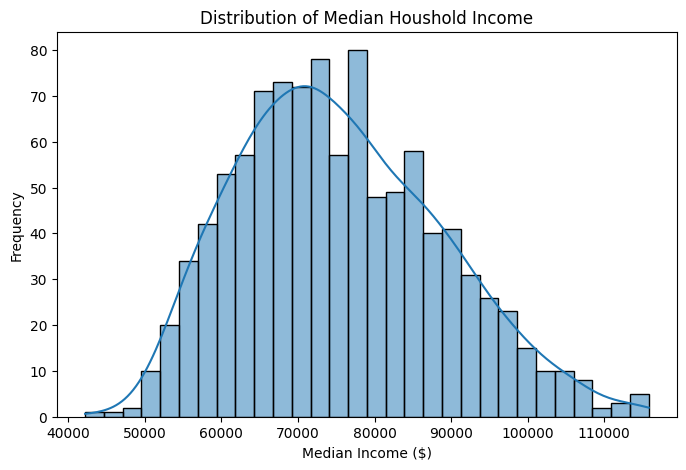

In [ ]:
# Histogram for Median Income (to check distribution):
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(clean_df['Median_Income_USD'], bins=30, kde=True)
plt.title("Distribution of Median Houshold Income")
plt.xlabel("Median Income ($)")
plt.ylabel("Frequency")
plt.show()

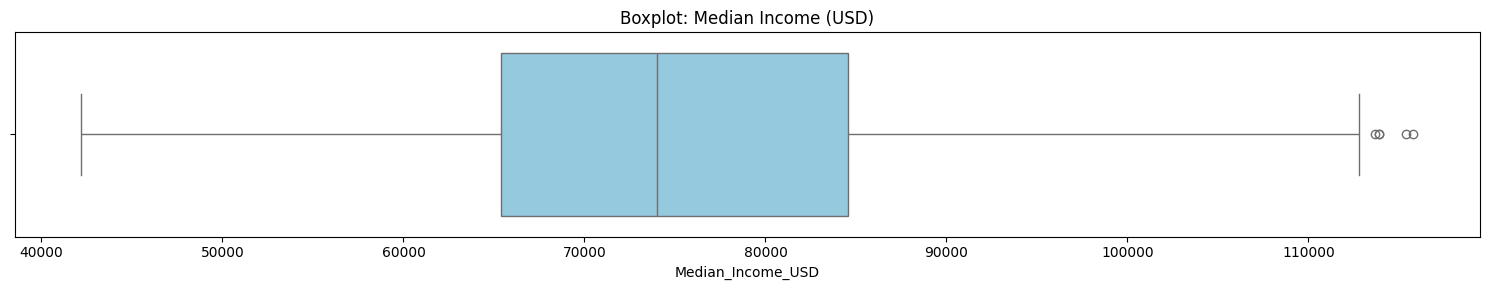

In [ ]:
# Boxplot for Median Income:
plt.figure(figsize=(15,3))
sns.boxplot(x=clean_df[column], color="skyblue")
plt.title("Boxplot: Median Income (USD)")
plt.tight_layout()
plt.show()

Distribution:

The histogram for Median Income shows a slight right skew in the distribution.

Most values are roughly between 50k USD and 95k USD with a long right tail is around 110k USD to 115k USD. The boxplot also confirms this and shows few high-end outliers. This shows the presence of wealthy states which are coming up as outliers (not an error in the data)

Log transformation for visual (because of presence of skew)




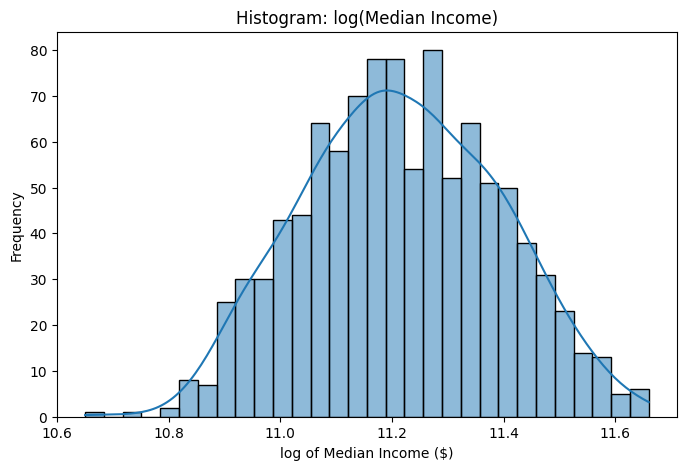

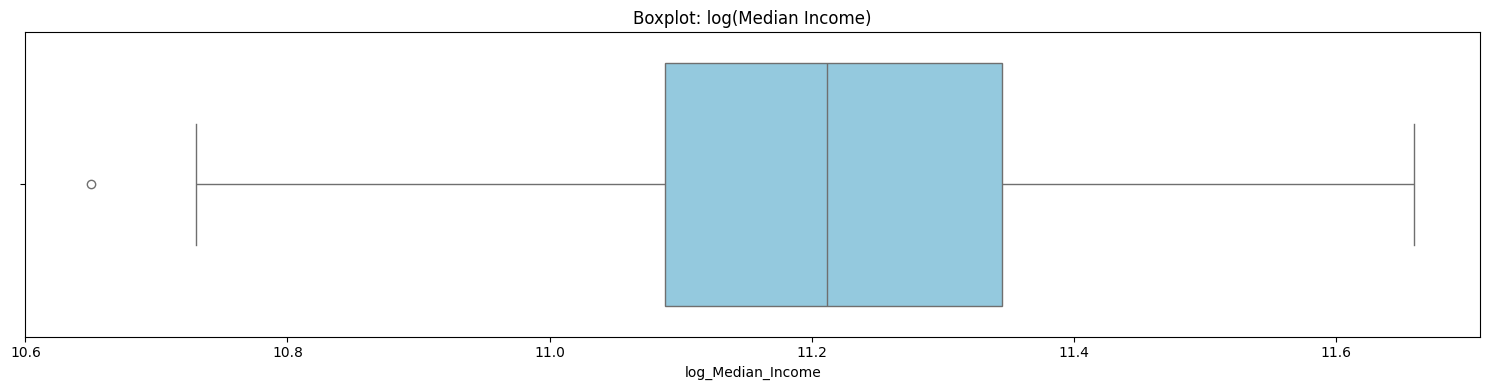

In [ ]:
# Performing log transformation and then visualizing again (because of presence skew)

print("Log transformation for visual (because of presence of skew)")
print("\n")
clean_df['log_Median_Income'] = np.log(clean_df[column])
plt.figure(figsize=(8,5))
sns.histplot(clean_df['log_Median_Income'], bins=30, kde=True)
plt.title("Histogram: log(Median Income)")
plt.xlabel("log of Median Income ($)")
plt.ylabel("Frequency")
plt.show()
print("\n")
# Boxplot log transformed:

plt.figure(figsize=(15,4))
sns.boxplot(x=clean_df['log_Median_Income'], color="skyblue")
plt.title("Boxplot: log(Median Income)")
plt.tight_layout()
plt.show()

Transformation:

Performed log transformation because the income data is right skewed and there are handful of very high values labeled as outliers.

Log transformation will help reduce effect of very high values that are present in the dataset.

Variable 4 -- Homeownership Rates:

In [ ]:
column = 'Homeownership_Rate_Percent'
print("Column:", column)
print("Datatype:", clean_df[column].dtype)
print("Unit: %")
print("Descriptive Stats:")
display(clean_df[column].describe())

# IQR outliers (summary):

home_out = iqr_outliers(clean_df[column])
print("\nIQR outlier summary:", home_out)

Column: Homeownership_Rate_Percent
Datatype: float64
Unit: %
Descriptive Stats:


,Homeownership_Rate_Percent
count,1020.000000
mean,67.774314
std,6.164412
min,39.875000
25%,65.318750
50%,68.787500
75%,71.600000
max,81.325000



IQR outlier summary: {'q1': np.float64(65.31875), 'q3': np.float64(71.6), 'iqr': np.float64(6.28125), 'lower': np.float64(55.896874999999994), 'upper': np.float64(81.021875), 'outliers_sample': [55.325, 40.15, 52.725, 55.85, 40.225, 53.275000000000006, 55.275, 42.275, 53.875, 54.25, 42.25, 53.625, 42.5, 54.825, 40.2, 52.0, 55.175, 39.875, 50.975, 54.375], 'outliers_index': [4, 8, 32, 55, 59, 83, 106, 110, 134, 157, 161, 185, 212, 236, 259, 263, 287, 310, 314, 338, 361, 365, 385, 389, 412, 416, 436, 440, 463, 467, 487, 491, 514, 518, 542, 565, 569, 593, 616, 620, 640, 644, 667, 671, 674, 695, 722, 746, 773, 797, 824, 848, 875, 926, 950, 977, 1017]}


- The variable "Homeownership_Rate_Percent" has a numeric data type (float64)

- Units: Percentage (%)

- The variable represents percentage of homeownership

- Descriptive statistics for homeownership rate is displayed (explained in detail in the preprocessing step (project 2))

- IQR summary: shows the exact outlier values and their indices. There were 57 values that were flagged as outliers (mostly low values (< 56%), few high values (> 81%)). These outliers might be due to some states/years having lower homeownership rates due to certain factors.

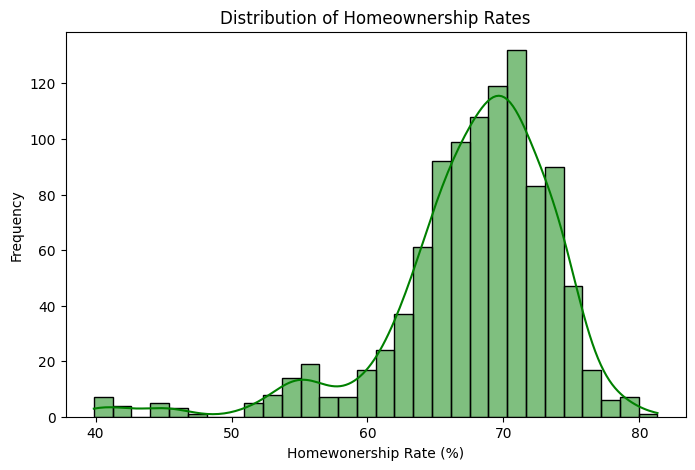

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(clean_df['Homeownership_Rate_Percent'], bins=30, kde=True, color="green")
plt.title("Distribution of Homeownership Rates")
plt.xlabel("Homewonership Rate (%)")
plt.ylabel("Frequency")
plt.show()

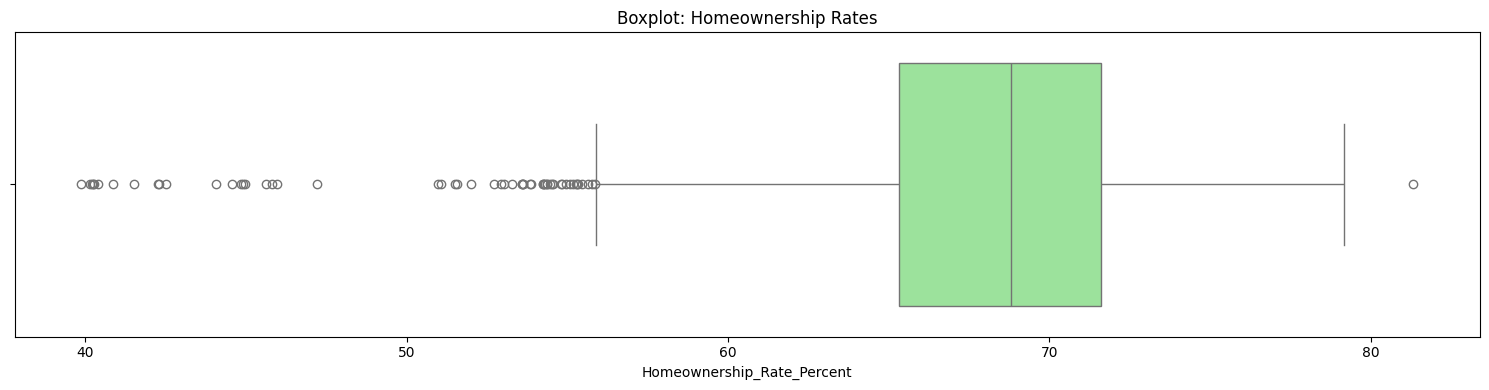

In [ ]:
# Boxplot: Homeownership Rates

plt.figure(figsize=(15,4))
sns.boxplot(x=clean_df[column], color="lightgreen")
plt.title("Boxplot: Homeownership Rates")
plt.tight_layout()
plt.show()

Distribution:

The histogram shows that most state-year homeownership rates are roughly between 60% to 73%.

The average rate seems to be around 68% (also confirmed by the descriptive statistics)

The boxplot shows that numerous points are beyond the IQR. The distribution is not symmetric either, as there are few higher values and numerous lower values.

Variable 5 -- Population:

In [ ]:
column = 'Population'
print("Column:", column)
print("Unit: population counts")
print("Descriptive stats:")
display(clean_df[column].describe())

# IQR outliers (summary):

pop_out = iqr_outliers(clean_df[column])
print("\nIQR outlier summary:", pop_out)

Column: Population
Unit: population counts
Descriptive stats:


,Population
count,1.020000e+03
mean,6.248962e+06
std,7.034730e+06
min,5.141570e+05
25%,1.767858e+06
50%,4.373199e+06
75%,7.197289e+06
max,3.952196e+07



IQR outlier summary: {'q1': np.float64(1767858.5), 'q3': np.float64(7197288.75), 'iqr': np.float64(5429430.25), 'lower': np.float64(-6376286.875), 'upper': np.float64(15341434.125), 'outliers_sample': [39431263, 23372215, 19867248, 31290831, 39198693, 22904868, 19737367, 30727890, 39142414, 22379312, 19703747, 30113488, 39142565, 21831949, 19848276, 29570351, 39521958, 21592035, 20105171, 29239570], 'outliers_index': [4, 9, 32, 43, 55, 60, 83, 94, 106, 111, 134, 145, 157, 162, 185, 196, 208, 213, 236, 247, 259, 264, 287, 298, 310, 315, 338, 349, 361, 366, 389, 400, 412, 417, 440, 451, 463, 468, 491, 502, 514, 519, 542, 553, 565, 570, 593, 604, 616, 621, 644, 655, 667, 672, 695, 706, 718, 723, 746, 757, 769, 774, 797, 808, 820, 825, 848, 859, 871, 876, 899, 910, 922, 927, 950, 961, 973, 978, 1001, 1012]}


- The variable "Population" has a numeric data type

- Units: number of people (counts)

- Descriptive statistics for population is displayed (explained in detail in the preprocessing step (project 2))

- IQR summary: shows the exact outlier values and their indices. 80 state-year observations were flagged as outliers using this method (mostly higher values). This must be due to very highly populated states across multiple years.

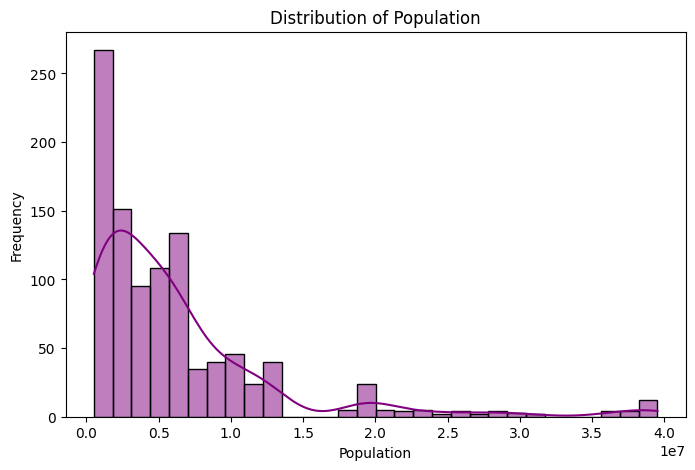

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(clean_df['Population'], bins=30, kde=True, color="purple")
plt.title("Distribution of Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

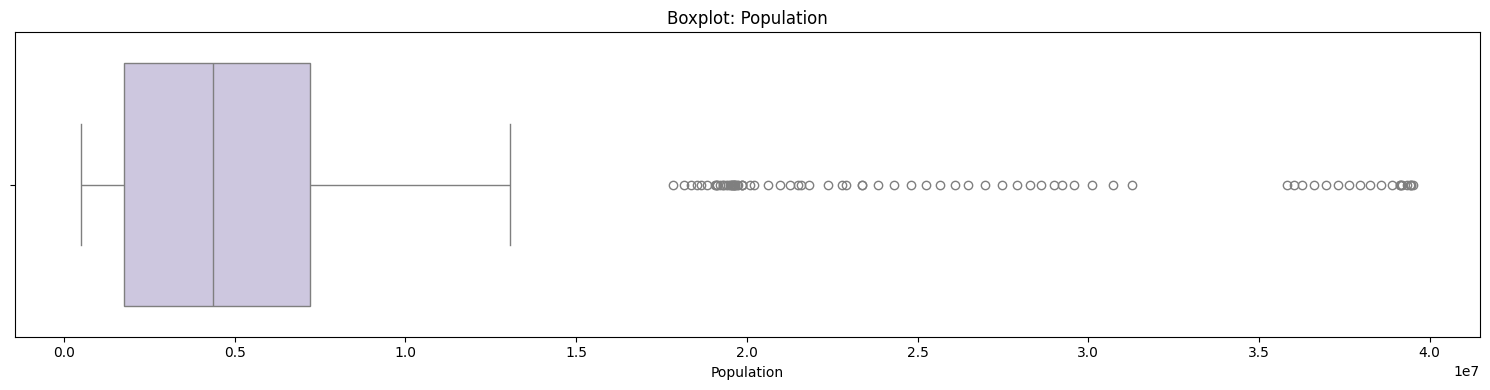

In [ ]:
plt.figure(figsize=(15,4))
sns.boxplot(x=clean_df[column], color="#CBC3E3")
plt.title("Boxplot: Population")
plt.tight_layout()
plt.show()

Distribution:

The histogram shows the expected long right tail (skew) which makes sense due to presence of very largely populated states.

Boxplot clearly shows the higher value outliers.

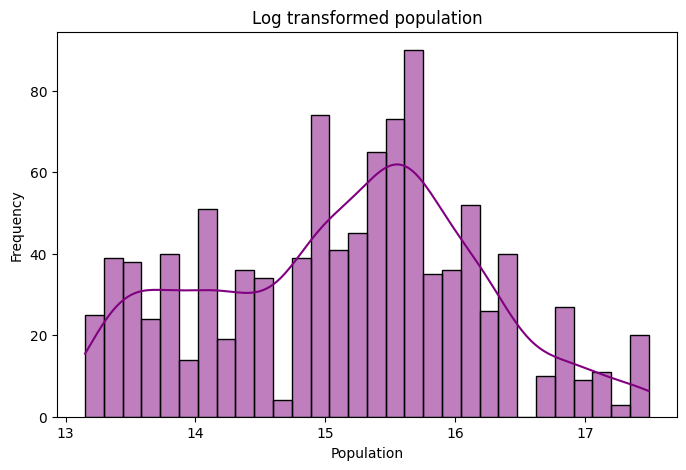

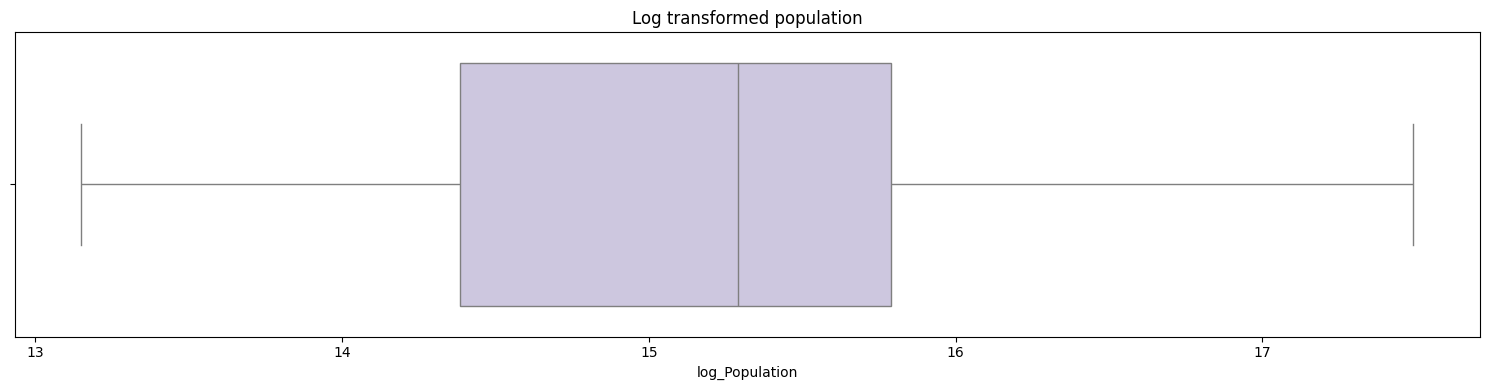

In [ ]:
# Performing log transformation and then visualizing again (because of presence of skew)

clean_df["log_Population"] = np.log(clean_df[column])

# Histogram with log transformed population:

plt.figure(figsize=(8,5))
sns.histplot(clean_df['log_Population'], bins=30, kde=True, color="purple")
plt.title("Log transformed population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

# Boxplot log transformed:

plt.figure(figsize=(15,4))
sns.boxplot(x=clean_df['log_Population'], color="#CBC3E3")
plt.title("Log transformed population")
plt.tight_layout()
plt.show()

Transformation:

Performed log transformations because the population has such a large spread and skewness. This way, large states will not dominate the models when we perform further analysis.

Inspecting rows flagged as outliers:

In [ ]:
# Creating boolean masks for IQR outliers for each variable
# Showing combined set and counts

mask_mi = ((clean_df['Median_Income_USD'] < iqr_outliers(clean_df['Median_Income_USD'])['lower']) | (clean_df['Median_Income_USD'] > iqr_outliers(clean_df['Median_Income_USD'])['upper']))

mask_home = ((clean_df['Homeownership_Rate_Percent'] < iqr_outliers(clean_df['Homeownership_Rate_Percent'])['lower']) | (clean_df['Homeownership_Rate_Percent'] > iqr_outliers(clean_df['Homeownership_Rate_Percent'])['upper']))

mask_pop = ((clean_df['Population'] < iqr_outliers(clean_df['Population'])['lower']) | (clean_df['Population'] > iqr_outliers(clean_df['Population'])['upper']))

combined_mask = mask_mi | mask_home | mask_pop
outlier_rows = clean_df[combined_mask].copy()

print("Total rows flagged as outliers (for numeric variables):", len(outlier_rows))
display(outlier_rows[['State', 'Year', 'Median_Income_USD', 'Homeownership_Rate_Percent', 'Population']].sort_values(['State', 'Year']).head(50))

Total rows flagged as outliers (for numeric variables): 110


,State,Year,Median_Income_USD,Homeownership_Rate_Percent,Population
973,California,2005,79380,59.700,35827943
922,California,2006,82460,60.150,36021202
871,California,2007,81000,58.325,36250311
820,California,2008,79930,57.500,36604337
769,California,2009,79010,56.950,36961229
718,California,2010,75370,56.100,37319550
667,California,2011,71870,55.300,37636311
616,California,2012,75340,54.525,37944551
565,California,2013,79360,54.300,38253768
514,California,2014,77850,54.225,38586706


Outliers:

Looking at the first 50 outputs, most outliers belong to the states: California, DC, or Florida. These states are being flagged because one or more of their numeric values are outside the IQR threshold.

This result makes sense. States like California and DC tend to have much higher incomes and more extreme population densities than most states

Florida is also very populated and shows fluctuating homeownership rates.

Hence these outliers are not errors, but valid extreme values


Like before, I have decided to not drop the outliers because they are not errors in my dataset. Dropping these values would cause bias in my analysis.

Instead I opted to log transform income and population values as they showed noticeable skew in the dataset. Moreover, in the future I decide to use models that reduce the effects of outliers.



*Is this different from what I initially thought?*

Not really. Earlier, during the preprocessing step, I had flagged outliers using the z-score method which showed similar patterns in the presence of outliers in my dataset.

However, by creating histrograms and boxplots of each variable's distribution, I was clearly able to visualize the spread of my data and the characteristics of the outliers (ex. lower value or higher value outliers). This helped me decide if I should perform transformations or not.

**6. Exploring realtionships between variables**

In [ ]:
import statsmodels.api as sm

In [ ]:
# Used Census to label States with their respective regions
# Added Washington D.C as Northeast
region_map = {
    'Maine':'Northeast','New Hampshire':'Northeast','Vermont':'Northeast','Massachusetts':'Northeast','Rhode Island':'Northeast',
    'Connecticut':'Northeast','New York':'Northeast','New Jersey':'Northeast','Pennsylvania':'Northeast',
    'Ohio':'Midwest','Michigan':'Midwest','Indiana':'Midwest','Illinois':'Midwest','Wisconsin':'Midwest',
    'Minnesota':'Midwest','Iowa':'Midwest','Missouri':'Midwest','North Dakota':'Midwest','South Dakota':'Midwest',
    'Nebraska':'Midwest','Kansas':'Midwest',
    'Delaware':'South','Maryland':'South','District of Columbia':'South','Virginia':'South','West Virginia':'South','North Carolina':'South',
    'South Carolina':'South','Georgia':'South','Florida':'South','Kentucky':'South','Tennessee':'South','Mississippi':'South','Alabama':'South',
    'Oklahoma':'South','Texas':'South','Arkansas':'South','Louisiana':'South',
    'Idaho':'West','Montana':'West','Wyoming':'West','Nevada':'West','Utah':'West','Colorado':'West','Arizona':'West','New Mexico':'West',
    'Alaska':'West','Washington':'West','Oregon':'West','California':'West','Hawaii':'West', 'District of Columbia': 'Northeast'

}
clean_df['Region'] = clean_df['State'].map(region_map).fillna('other')

print("Rows:", len(clean_df))
print("Regions present:", clean_df['Region'].unique())

Rows: 1020
Regions present: ['South' 'West' 'Northeast' 'Midwest']


Determining correlations between variables

Correlation matrix                             Median_Income_USD  Homeownership_Rate_Percent  \
Median_Income_USD                    1.000000                   -0.293608   
Homeownership_Rate_Percent          -0.293608                    1.000000   
Population                           0.025499                   -0.299486   

                            Population  
Median_Income_USD             0.025499  
Homeownership_Rate_Percent   -0.299486  
Population                    1.000000  


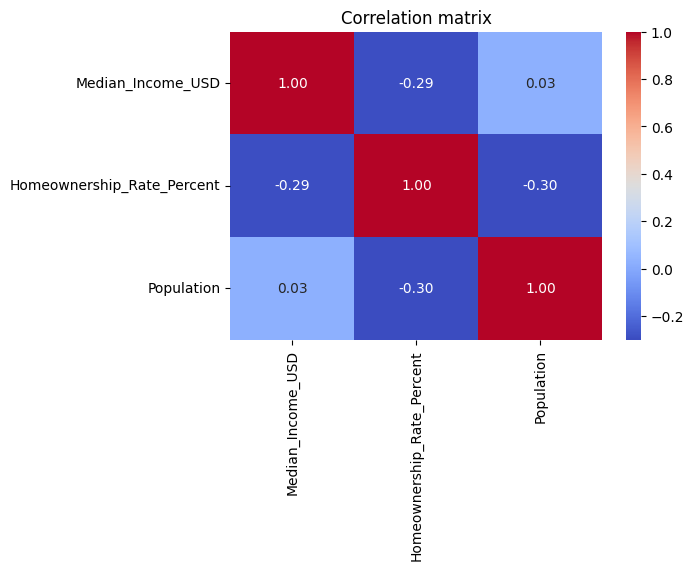

In [ ]:
# Correlations:

numeric_cols = ['Median_Income_USD', 'Homeownership_Rate_Percent', 'Population']
correlation = clean_df[numeric_cols].corr()

print("Correlation matrix", correlation)

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

Correlation Matrix:

The correlation matrix shows that median income and homownership rates have a weak to moderate negative relationship ~ -0.29.

Whereas, population is weakly correlated with income, and negatively weakly correlated with homeownership.

This means that higher income states tend to have lower homeownership rates.

(could be due to urbanization, where income is high but homeownership is lower)

Scatter plot for overall homeownership vs income to see if any patterns exists

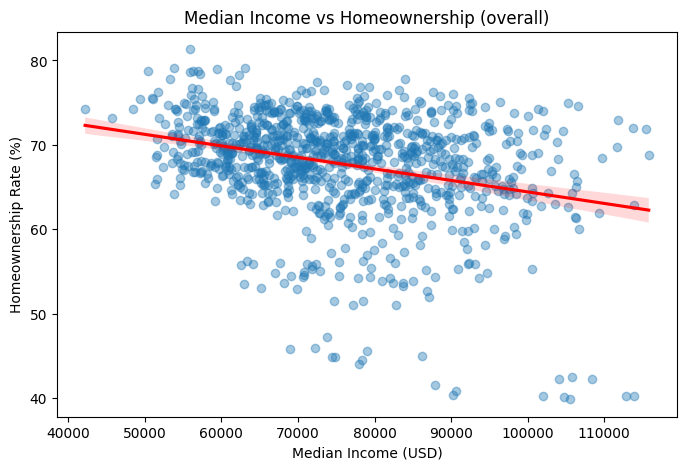

In [ ]:
# Scatter plot for Income vs Homeownership (overall):

plt.figure(figsize=(8,5))
sns.regplot(data=clean_df,
            x='Median_Income_USD',
            y='Homeownership_Rate_Percent',
            scatter_kws={'alpha':0.4,}, line_kws={'color':'red'})
plt.title("Median Income vs Homeownership (overall)")
plt.xlabel("Median Income (USD)")
plt.ylabel("Homeownership Rate (%)")
plt.show()


Scatterplot: Income vs Homeownership

This scatterplot shows that the overall linear fit is slightly negative (as income increases, homeownership seems to decrease)

However, the spread of points is pretty wide. This means that the line of best fit is not as sharp as you would expect. Therefore, there is an inverse relationship but it is weak.

The scatter also shows clustering near the 50% to 70% homeownership rates and 50k USD to 80k USD income range.



Understanding regional distribution of homeownership and income:

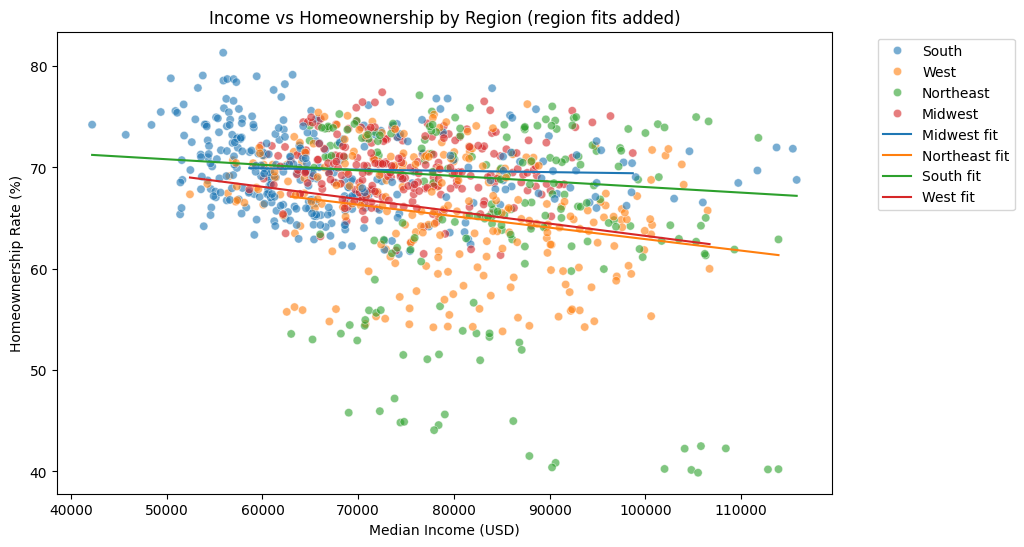

In [ ]:
# Region scatter plot (To understand the regional distribution):

plt.figure(figsize=(10,6))
sns.scatterplot(data=clean_df,
                x='Median_Income_USD',
                y='Homeownership_Rate_Percent',
                hue='Region',
                alpha=0.6)
# Adding a linear fit for each region:

for r, sub in clean_df.groupby('Region'):
  if len(sub) > 10:
    coeff = np.polyfit(sub['Median_Income_USD'], sub['Homeownership_Rate_Percent'], 1)
    xs = np.linspace(sub['Median_Income_USD'].min(), sub['Median_Income_USD'].max(), 50)
    plt.plot(xs, coeff[0]*xs + coeff[1], label=f"{r} fit")

plt.title("Income vs Homeownership by Region (region fits added)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel("Median Income (USD)")
plt.ylabel("Homeownership Rate (%)")
plt.show()



Scatterplot: region

This scatterplot colors points by census region and draws a line of best fit per region.

There is a presence of regional patterns like west or south states have a steeper negative slope.

This suggests that I should look into state-level differences such as urbanization and housing costs

Checking for time related trends:

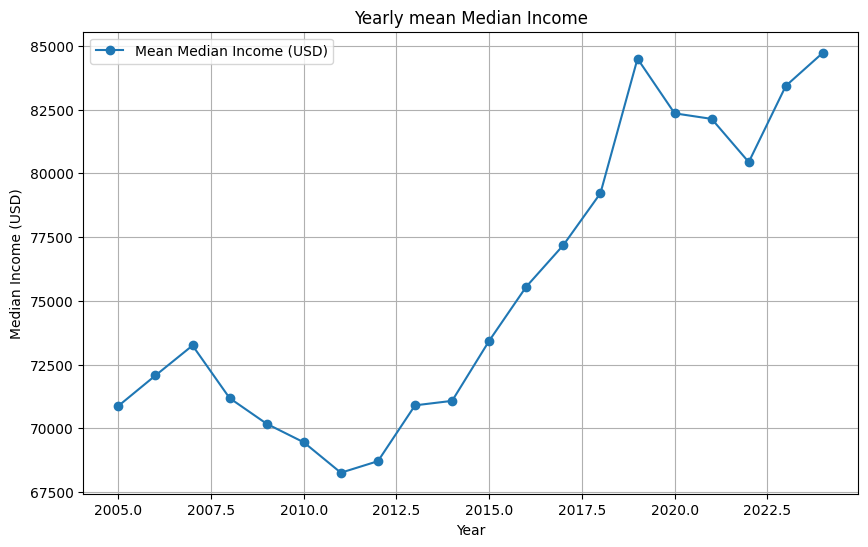

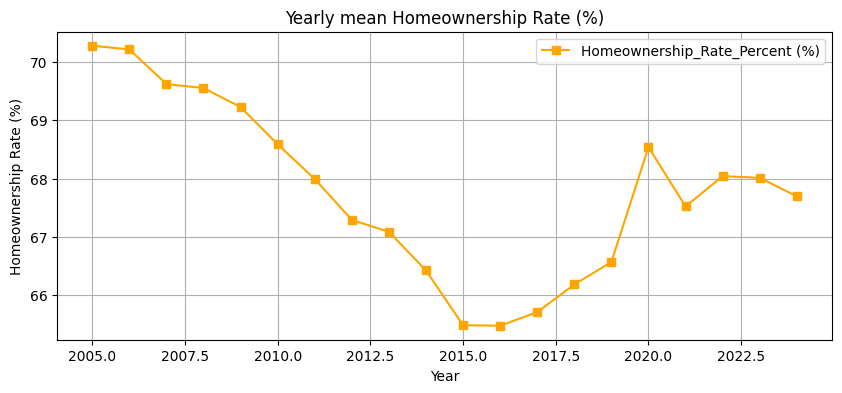

In [ ]:
# Plotting yearly means
# to see if there were any time related trends in Homeownership vs Income

# Median Income (Yearly mean)
agg_year = clean_df.groupby('Year')[numeric_cols].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(agg_year['Year'], agg_year['Median_Income_USD'],
         marker='o', label='Mean Median Income (USD)')
plt.xlabel('Year')
plt.ylabel('Median Income (USD)')
plt.title('Yearly mean Median Income')
plt.grid(True)
plt.legend()
plt.show()

# Homeownership Rates (Yearly means)
plt.figure(figsize=(10,4))
plt.plot(agg_year['Year'], agg_year['Homeownership_Rate_Percent'],
         color='orange', marker='s', label='Homeownership_Rate_Percent (%)')
plt.xlabel('Year')
plt.ylabel('Homeownership Rate (%)')
plt.title('Yearly mean Homeownership Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

Comparing time related trends for both homeownership and median income on the same graph:

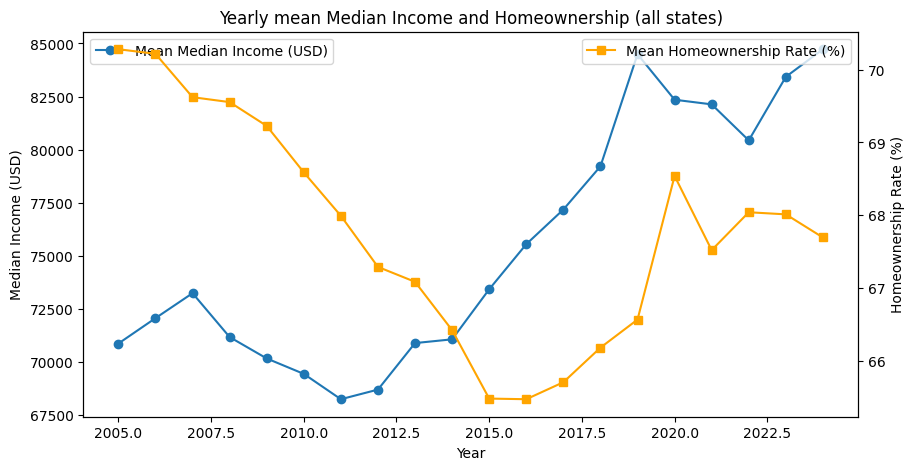

In [ ]:
# Combining the axes for yearly means of both Income and Homeownership Rates into a single graph for comparison

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(agg_year['Year'], agg_year['Median_Income_USD'], marker='o', label='Mean Median Income (USD)')
ax1.set_xlabel('Year'); ax1.set_ylabel('Median Income (USD)')
ax2 = ax1.twinx()
ax2.plot(agg_year['Year'], agg_year['Homeownership_Rate_Percent'], color='orange', marker='s', label= 'Mean Homeownership Rate (%)')
ax2.set_ylabel('Homeownership Rate (%)')
ax1.legend(loc='upper left'); ax2.legend(loc='upper right')
plt.title("Yearly mean Median Income and Homeownership (all states)")
plt.show()

Time related trends:

By combining the time related trends for both income and homeownership, I was able to identify yearly/long-term trends in the data.

There are no patterns common to both income and homeownership. However, we can see a decline in homeownership rate between 2008 and 2012 (falls in line with the housing crisis that occured during this time). There was also a decline in income from around 2007 to 2011.

Another interesting pattern I see in this time trend graph, is the peak in both homeownership rates and income around the same range of years (the peak doesn't fall on the same year but occured adjacent to each other) around the years 2019 to 2021 (did covid 19 pandemic have something to do with these peaks?)



In [ ]:
# Checking frequency of homeownership decrease for the states that experienced declines
df_sorted = clean_df.sort_values(['State','Year']).copy()
df_sorted['HO_prev'] = df_sorted.groupby('State')['Homeownership_Rate_Percent'].shift(1)
df_sorted['HO_decrease'] = (df_sorted['Homeownership_Rate_Percent'] < df_sorted['HO_prev']).astype(int)
decrease_counts = df_sorted.groupby('State')['HO_decrease'].sum().sort_values(ascending=False)

print("Top 10 states with most years of decreasing homeownership (count):")
print(decrease_counts.head(10))

Top 10 states with most years of decreasing homeownership (count):
State
Indiana        13
Washington     13
Utah           13
Louisiana      12
Connecticut    12
Florida        12
Oklahoma       12
Minnesota      12
Maryland       12
Tennessee      12
Name: HO_decrease, dtype: int64


Frequency of homeownership declines:

Out of curiosity, I decided to check frequency of homeownership decrease for the states that experienced declines (which could be due to external factors like housing cost and local economic stress)

This gave me a list of top 10 states that fell into the category that I was examining and how many times they experienced decline.

This did not reveal much but I plan to look into statewise effects later where this might be helpful.

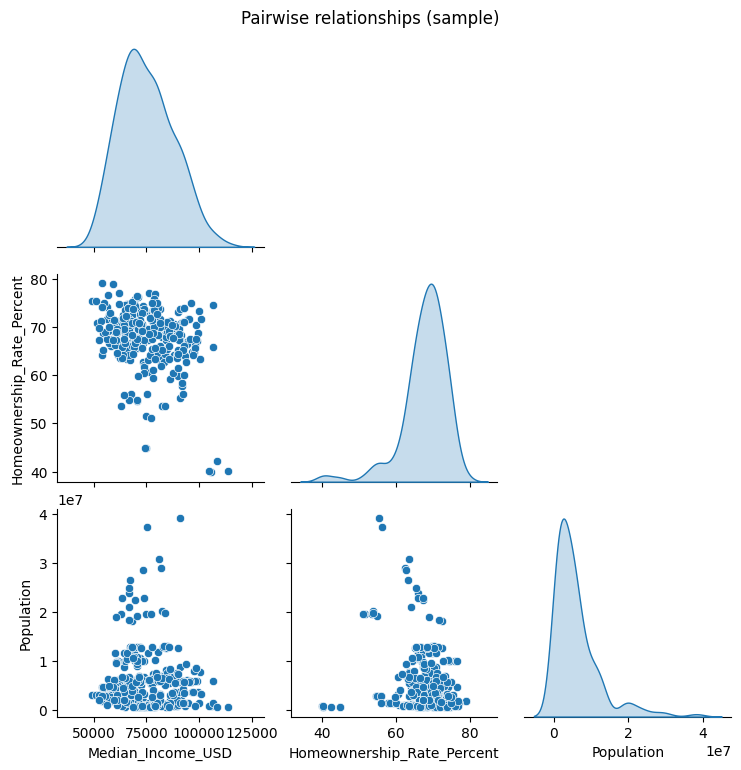

In [ ]:
# Pairwise plotting:

sample_num = min(300, len(clean_df))
sample = clean_df.sample(sample_num, random_state=1)
sns.pairplot(sample[['Median_Income_USD', 'Homeownership_Rate_Percent', 'Population']], diag_kind='kde', corner=True)
plt.suptitle("Pairwise relationships (sample)", y=1.02)
plt.show()



Pairwise scatterplot:

Median Income vs Population: shows no clear trend, other than the heavy clustering near lower population ranges which is where most states population would be present.

Homeownership vs Income: reveals a slight but consistent negative trend - areas with higher incomes tend to have somewhat lower homeownership rates. The skew towards higher values is also confirmed by the graph above

Extra Credit -- Simpson's Paradox:

In [ ]:
# Simpson's paradox check
# (Computing Ordinary Least Square slopes for the overall data and also by region):

def ols_slope(x,y):
  X = sm.add_constant(x)
  model = sm.OLS(y, X).fit()
  return model.params[1], model.rsquared, model.pvalues[1]

overall_slope, overall_r2, overall_p = ols_slope(clean_df['Median_Income_USD'], clean_df['Homeownership_Rate_Percent'])


region_list = []
for region, g in clean_df.groupby('Region'):
  if len(g) < 6:
    continue
  slope, r2, pval = ols_slope(g['Median_Income_USD'], g['Homeownership_Rate_Percent'])
  region_list.append({'Region':region, 'n':len(g), 'slope':slope, 'r2':r2, 'pval':pval})

region_df = pd.DataFrame(region_list).sort_values('slope', ascending=False).reset_index(drop=True)

print("Overall slope (Income vs Homeownership):", overall_slope, "R2:", overall_r2, "p:", overall_p)

display(region_df)

Overall slope (Income vs Homeownership): -0.00013635972852654312 R2: 0.08620587509201816 p: 9.945009255588665e-22


/tmp/ipython-input-315556899.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1], model.rsquared, model.pvalues[1]
/tmp/ipython-input-315556899.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1], model.rsquared, model.pvalues[1]
/tmp/ipython-input-315556899.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1], model.rsquared, model.pvalues[1]
/tmp/ipython-input-315

,Region,n,slope,r2,pval
0,Midwest,240,-0.000013,0.001110,0.607529
1,South,320,-0.000055,0.033511,0.001003
2,Northeast,200,-0.000113,0.019905,0.046291
3,West,260,-0.000121,0.073029,0.000010


Simpson's Paradox:

Overall slope: slightly negative. This means income is negatively associated with homeownership.

When broken by regions:

- Midwest - Very weak, insignificant negative trend

- South - Weak, significant negative trend

- Northeast - Weak negative trend, boderline significant

- West - Weak-moderate negative trend, significant


Since overall trend is negative and so is the regional trends. This means none of the subgroups are showing opposite trend.

**Therefore, there is no Simpson's Paradox**



**7. Is this dataset reasonable to use?**

For the most part, my dataset has valuable variables that are helpful in exploring and analyzing my hypothesis statment. However, from looking at my plots, graphs and relationships between variables, I have realized that homeownership is driven by many factors beyond just median income and population.

Some factors such as housing prices, household structure, and employment could also have affect on the homeownership rates.

To overcome this oversimplification of my analysis, I plan to collect more data related to other factors that might play a role in affecting homeownership rates.

I also think it is necessary to handle inflation in economy when it comes to my median income variable. If available, I will look into compiling inflation adjusted incomes.

**8. Wrapping up**

*Did this effect my hypothesis?*

Yes. My hypothesis statement was "If median household income increases, then homeownership rate will also increase"

However, outcomes of my EDA and modelling suggested otherwise. Graphing relationships revealed that there is a slightly negative trend in the relationship between median income and homeownership rates.

This suggests that there are other factors that I must consider in my study and my original hypothesis is not valid, and must be revised.

*Key findings summary:*

Distribution:

- Median Income: right-skewed; log transformation performed

- Population: heavily right-skewed; log transformation performed

- Homeownership rate: also skewed; most values between 55% and 72% with some states-years as outliers

- Future plan: Considering adding inflation adjusted median income data, if available.

Outliers:

- Used IQR for finding outliers this time.

- This flagged ~110 rows (most from CA, DC, and Florida). I determined that these are valid high-end points and must not be eliminated as this may cause bias in results

- Outliers are especially influential in population and income dataset

Correlation and Pairwise relationships:

- Correlation heatmap and pairplots showed a weak to moderate negative correlation between median income and homeownership, but pairwise scatterplots revealed that income alone does not have enough predictive power.

Regional heterogenity:

- Regional differences matter. As regional slopes were all negative but had slight variance , like 'West' showed strongest negative trend (comparitively).

- This helped me interpret that, urban, high-cost regions can have high incomes but low homeownership rates due to housing affordability which again circles back to the fact that I must look into other variable datasets that might have an affect on homeownership rates.

Time trends:

- There are no patterns common to both income and homeownership when it came to yearly mean comparisons. However, we can see a decline in homeownership rate between 2008 and 2012 (falls in line with the housing crisis that occured during this time). There was also a decline in income from around 2007 to 2011.

- Something that I would like to explore further is the peak increase that occured in both the median income and homeownership graphs at around the same time range (2019-2021). The range of years falls in line with when covid 19 pandemic occured which makes me curious to explore the relationship between these events.

Further exploration plan:

- Considering adding inflation adjusted median income data, if available.

- Looking into other variable datasets that might have an affect on homeownership rates.

- Explore and understand statewise trends more thoroughly.

# **Analysis, Hypothesis Testing, and ML**

Before I begin Project 4:

Revision of my Hypothesis Statement

**Original Hypothesis**: If the median household income of a state increases, then the homeownership rate in the state will also increase.

Based on the exploratory data analysis and visualizations from project 3, I discovered that my original hypothesis statement was not supported by my dataset.

After discussing with Prof. Tammy, I decided that it would be best to revise my hypothesis and collect Housing Price Index (HPI) data to have a better understanding of the relationship between my variables.

HPI directly measures housing costs and allows me to calculate housing affordability (Income-to-HPI ratio).

This is also helpful because:

- High income alone doesn't guarantee homeownership if housing is expensive

- HPI captures the affordability which was originally a missing element from income-only analysis



**Updated Hypothesis Statement:**

If the median household income of a state increases, then the homewonership rate in that state will decrease

---- Data Collection (for HPI (Housing Price Index))

In [ ]:
hpi_path = "/content/drive/MyDrive/Colab Notebooks/hpi_at_state.csv"
hpi_df = pd.read_csv(hpi_path)

print(hpi_df.head())

print("\nHPI dataset original shape:")
hpi_df.shape

print("\n HPI column names:")
hpi_df.columns.tolist()

     State Abbreviation  FIPS  Year  Annual Change (%)     HPI  \
0  Alabama           AL     1  1975                NaN  100.00   
1  Alabama           AL     1  1976               8.21  108.21   
2  Alabama           AL     1  1977              10.35  119.41   
3  Alabama           AL     1  1978               7.90  128.85   
4  Alabama           AL     1  1979              10.88  142.87   

   HPI with 1990 base  HPI with 2000 base  
0               48.78               35.36  
1               52.79               38.26  
2               58.25               42.23  
3               62.85               45.56  
4               69.69               50.52  

HPI dataset original shape:

 HPI column names:


['State',
 'Abbreviation',
 'FIPS',
 'Year',
 'Annual Change (%)',
 'HPI',
 'HPI with 1990 base',
 'HPI with 2000 base']

---- Performing some necessary preprocessing to prepare the dataset to be merged with my dataset:

In [ ]:
# Filter for years 2005 to 2024:

hpi_filtered = hpi_df[(hpi_df['Year'] >=2005) & (hpi_df['Year'] <= 2024)].copy()

print("HPI shape after filtering for years required (2005-2024):")
hpi_filtered.shape

HPI shape after filtering for years required (2005-2024):


(1020, 8)

In [ ]:
# Removing unnecessary columns
# I only want State, Year, and HPI columns from this dataset:

hpi_clean = hpi_filtered[['State', 'Year', 'HPI']].copy()

# Checking for missing values:

print(hpi_clean.isnull().sum())

# Removing any rows with missing values:

hpi_clean = hpi_clean.dropna(subset=['HPI'])
print(hpi_clean.shape)

print(hpi_clean.head())

State    0
Year     0
HPI      0
dtype: int64
(1020, 3)
      State  Year     HPI
30  Alabama  2005  340.07
31  Alabama  2006  366.84
32  Alabama  2007  381.99
33  Alabama  2008  385.21
34  Alabama  2009  376.31


In [ ]:
# Verifying that all states are present (must be 51 states):

print(f"\nNumber of unique states in HPI data: {hpi_clean['State'].nunique()}")

# Verifying the years:

print(f"Year range: {hpi_clean['Year'].min()} to {hpi_clean['Year'].max()}")

# Checking for duplicate state-year pairs

duplicates = hpi_clean.duplicated(subset=['State', 'Year']).sum()
if duplicates > 0:
  print(f"{duplicates} duplicate state-year pairs")
else:
  print(f"No duplicate state-year pairs")


Number of unique states in HPI data: 51
Year range: 2005 to 2024
No duplicate state-year pairs


In [ ]:
# Checking the clean dataset that I have been working on:

print(clean_df.head())
print(clean_df.shape)

        State  Year  Median_Income_USD  Homeownership_Rate_Percent  \
0     Alabama  2024              65560                      72.625   
1      Alaska  2024              91260                      66.150   
2     Arizona  2024              84700                      69.125   
3    Arkansas  2024              64840                      66.625   
4  California  2024             100600                      55.325   

   Population  log_Median_Income  log_Population Region  
0     5157699          11.090721       15.456001  South  
1      740133          11.421468       13.514585   West  
2     7582384          11.346871       15.841338   West  
3     3088354          11.079678       14.943149  South  
4    39431263          11.518908       17.490070   West  
(1020, 8)


In [ ]:
# Because the dataset will be merged on State and Year columns,
# I will now check for any mismatches in the these columns before perfroming the merge

states_clean = set(clean_df['State'].unique())
states_hpi =set(hpi_clean['State'].unique())

states_only_in_clean = states_clean - states_hpi
states_only_in_hpi = states_hpi - states_clean

if states_only_in_clean:
  print(f"States in clean_df but not in HPI: {states_only_in_clean}")
if states_only_in_hpi:
  print(f"States in HPI but not in clean_df: {states_only_in_hpi}")

States in clean_df but not in HPI: {'District of Columbia'}
States in HPI but not in clean_df: {'District Of Columbia'}


State, District of Columbia, is written in two different ways in both datasets that I plan to merge

Therefore, my next step would be to fix the name before merging the datasets

In [ ]:
clean_df['State'] = clean_df['State'].str.title()
hpi_clean['State'] = hpi_clean['State'].str.title()

# Re-run the comparison code to verify the fix
states_clean = set(clean_df['State'].unique())
states_hpi = set(hpi_clean['State'].unique())
states_only_in_clean = states_clean - states_hpi
states_only_in_hpi = states_hpi - states_clean

if states_only_in_clean:
    print(f"States in clean_df but not in HPI: {states_only_in_clean}")
if states_only_in_hpi:
    print(f"States in HPI but not in clean_df: {states_only_in_hpi}")

In [ ]:
print(f"States in clean_df: {len(states_clean)}")
print(f"States in HPI: {len(states_hpi)}")

States in clean_df: 51
States in HPI: 51


Both datasets are now ready to merge

In [ ]:
# Performing merge:

merged_df = pd.merge(
    clean_df,
    hpi_clean,
    on=['State', 'Year'],
    how='inner'
)

print(f"Merged dataset shape: {merged_df.shape}")

Merged dataset shape: (1020, 9)


In [ ]:
# Verifying if the merge happened correctly:

print("\nColumn names and types:")
print(merge_df.dtypes)

print("\nDescriptive stats for HPI:")
print(merged_df['HPI'].describe())

print("\n missing values:")
print(merged_df.isnull().sum())

print("\nFirst and Last 10 rows of merged dataset:")
print(merged_df.head(10))
print(merged_df.tail(10))

print(f"\nCheck unique states: {merged_df['State'].nunique()}")
print(f"\nUnique years: {merged_df['Year'].nunique()}")

print(f"\nYear range: {merged_df['Year'].min()} to {merged_df['Year'].max()}")

# Checking for duplicate state-year pairs

duplicates = merged_df.duplicated(subset=['State', 'Year']).sum()
if duplicates > 0:
  print(f"{duplicates} duplicate state-year pairs")
else:
  print(f"\nNo duplicate state-year pairs")


Column names and types:
State                  object
Median_Income           int64
Year                    int64
Homeownership_Rate    float64
Population              int64
dtype: object

Descriptive stats for HPI:
count    1020.000000
mean      619.724961
std       284.027028
min       284.080000
25%       412.762500
50%       545.520000
75%       723.467500
max      2015.570000
Name: HPI, dtype: float64

 missing values:
State                         0
Year                          0
Median_Income_USD             0
Homeownership_Rate_Percent    0
Population                    0
log_Median_Income             0
log_Population                0
Region                        0
HPI                           0
dtype: int64

First and Last 10 rows of merged dataset:
                  State  Year  Median_Income_USD  Homeownership_Rate_Percent  \
0               Alabama  2024              65560                      72.625   
1                Alaska  2024              91260                   

Creating the affordability column called Income_to_HPI_Ratio

In [ ]:
# Creating features using the HPI column
# Created Income_to_HPI_Ratio to help measure housing affordability

merged_df['log_HPI'] = np.log(merged_df['HPI']+1)
merged_df['Income_to_HPI_Ratio'] = merged_df['Median_Income_USD'] / merged_df['HPI']

In [ ]:
print(merged_df.head())
print(merged_df.shape)

        State  Year  Median_Income_USD  Homeownership_Rate_Percent  \
0     Alabama  2024              65560                      72.625   
1      Alaska  2024              91260                      66.150   
2     Arizona  2024              84700                      69.125   
3    Arkansas  2024              64840                      66.625   
4  California  2024             100600                      55.325   

   Population  log_Median_Income  log_Population Region      HPI   log_HPI  \
0     5157699          11.090721       15.456001  South   610.27  6.415539   
1      740133          11.421468       13.514585   West   656.45  6.488369   
2     7582384          11.346871       15.841338   West  1114.88  7.017399   
3     3088354          11.079678       14.943149  South   639.01  6.461484   
4    39431263          11.518908       17.490070   West  1955.55  7.578938   

   Income_to_HPI_Ratio  
0           107.427860  
1           139.020489  
2            75.972302  
3         

**2. What kind of ML task?**

Type of learning:

Regression:

- My dependent variable (Homeownership_Rate_Percent) is a continous numerical value and I want to predict the homeownership rate based on income, population, and HPI features. This is a prediction problem with continous outcome, which makes regression the best option.

Type of learning: Supervised Learning

- I have labeled training data where both input features and output labels are known. The supervised learning algorithm will learn the relationship between features and the target variable.

High-Level Plan:

- Perform feature selection
- Apply feature scaling/normalization to handle different value ranges if needed
- Split data into training and testing
- Make predictions using the model
- Evaluate model performance on test set using different metrics like R^2, RMSE, MAE, etc.





**3. What features will you use?**

In [ ]:
# Creating a seperate dataframe for ML analysis

df_ml = merged_df.copy()
print(f'\nShape of the dataframe (for ML analysis): {df_ml.shape}')


Shape of the dataframe (for ML analysis): (1020, 11)


In [ ]:
# List of features:

print(f"\nAll coluumns: ")
for i, col in enumerate(df_ml.columns, 1):
  print(f" {i}. {col}")


All coluumns: 
 1. State
 2. Year
 3. Median_Income_USD
 4. Homeownership_Rate_Percent
 5. Population
 6. log_Median_Income
 7. log_Population
 8. Region
 9. HPI
 10. log_HPI
 11. Income_to_HPI_Ratio


In [ ]:
# Categorize features:

categorical_features = ['State']
time_features = ['Year']
original_numerical = ['Median_Income_USD', 'Homeownership_Rate_Percent', 'Population', 'HPI']
engineered_features = ['log_Median_Income', 'log_population', 'log_HPI', 'Income_to_HPI_Ratio']

print(f"\nTotal Features Available: {len(categorical_features) + len(time_features) + len(original_numerical) + len(engineered_features)}")


Total Features Available: 10


Feature Engineering Techniques Applied:

1. Log transformation: Log transformation was applied to the columns Median_Income_USD, Population, and HPI. This was done because all these variables show skew in distribution (discussed and applied in project 3) due to presence of outliers. Performing log transformation will reduce the effect of outliers/skew. It will also help normalize distributions and linearize relationships.



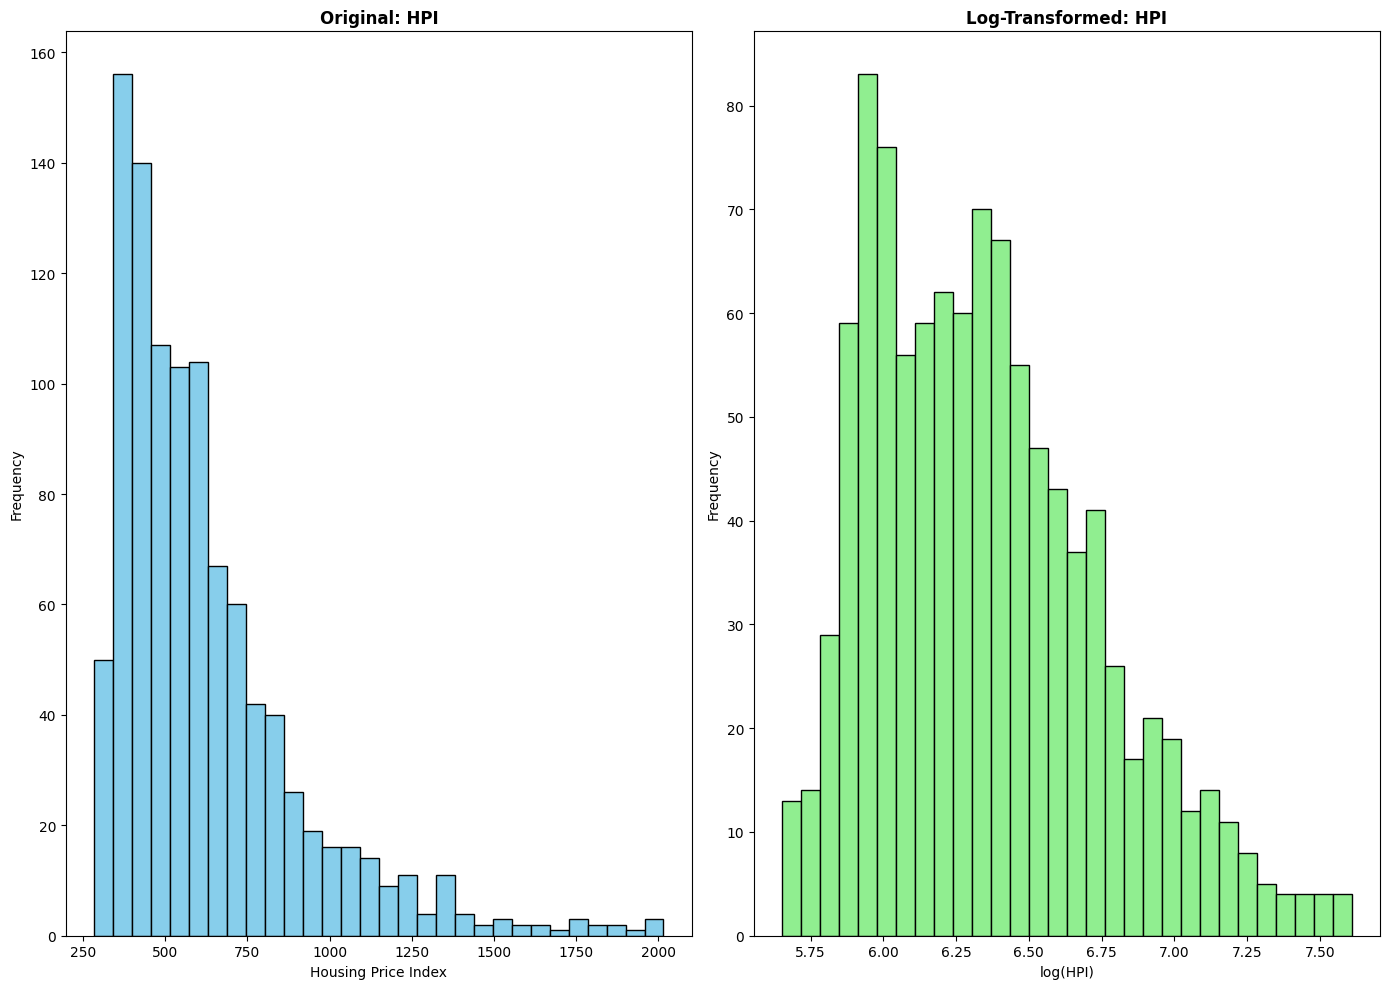

In [ ]:
# Visualizing HPI distribution as it is a new variable added
# and its distribution was not visualized in project 3:

fig, axes = plt.subplots(1, 2,  figsize=(14, 10))

# HPI
axes[0].hist(df_ml['HPI'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Original: HPI', fontweight='bold')
axes[0].set_xlabel("Housing Price Index")
axes[0].set_ylabel("Frequency")

# Log transformed HPI
axes[1].hist(df_ml['log_HPI'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Log-Transformed: HPI', fontweight='bold')
axes[1].set_xlabel('log(HPI)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

2. Ratio Creation (Domain-specific feature): Created Income_to_HPI_Ratio = Median_Icome_USD / HPI. I created this to measure housing affordability. If this ratio is high - Income is high relative to housing prices (MORE AFFORDABLE). Whereas, if the ratio is low - Income is low relative to housing prices (LESS AFFORDABLE). This theoretical feature will help in testing the hypothesis and relation between income and homeownership.

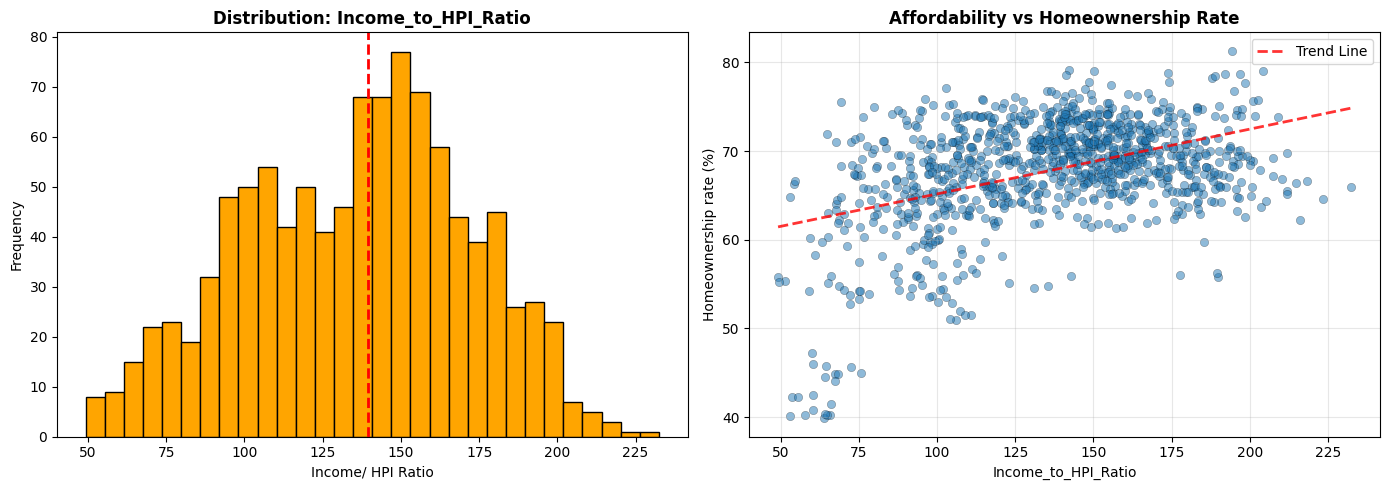

In [ ]:
# Showing distribution of affordability:

fig, axes = plt.subplots(1, 2,  figsize=(14, 5))

# Income_to_HPI_Ratio distribution
axes[0].hist(df_ml['Income_to_HPI_Ratio'], bins=30, color='orange', edgecolor='black')
axes[0].set_title('Distribution: Income_to_HPI_Ratio', fontweight='bold')
axes[0].set_xlabel("Income/ HPI Ratio")
axes[0].set_ylabel("Frequency")
axes[0].axvline(df_ml['Income_to_HPI_Ratio'].median(), color='red',
                linestyle='--', linewidth=2, label=f"Medain = {df_ml['Income_to_HPI_Ratio'].median():.2f}")


# Scatter plot: Affordability vs Homeownership
axes[1].scatter(df_ml['Income_to_HPI_Ratio'], df_ml['Homeownership_Rate_Percent'],
                alpha=0.5,edgecolors='k', linewidth=0.3)
axes[1].set_title('Affordability vs Homeownership Rate', fontweight='bold')
axes[1].set_xlabel('Income_to_HPI_Ratio')
axes[1].set_ylabel('Homeownership rate (%)')

axes[1].grid(True, alpha=0.3)

# Trend line:

z = np.polyfit(df_ml['Income_to_HPI_Ratio'].dropna(),
               df_ml['Homeownership_Rate_Percent'][df_ml['Income_to_HPI_Ratio'].notna()], 1)
p = np.poly1d(z)
x_sorted = df_ml['Income_to_HPI_Ratio'].dropna().sort_values()
axes[1].plot(x_sorted, p(x_sorted), "r--", linewidth=2, alpha=0.8, label='Trend Line')
axes[1].legend()

plt.tight_layout()
plt.show()

Positive trend is visible between Affordability and Homeownership (except a few points, most likely due to outliers).

This makes sense intuitively.

Removing columns I no longer need:

State:
- I have decided to remove the state column as it is categorical and it would increase my dimensionality since it would require 50 one-hot encoded dummy variables. Besides, regional differences are well captured by population and HPI variables.

Year:
- I have decided to remove the Year column as it is time related and might introduce dependencies, which would violate the assumption of independence for my model

Median_Income_USD (original):
- I will be replacing the median income column with the log-transformed version to reduce the effects of skew/outliers. Log transformed model will provide better model performance compared to using original numbers

Population (original):
- I will be replacing the population column with the log-transformed version to reduce the effects of skew/outliers. Log transformed model will provide better model performance compared to using original numbers

HPI (original):
- I will be replacing the HPI column with the log-transformed version to reduce the effects of skew/outliers. Log transformed model will provide better model performance compared to using original numbers. HPI original numbers were used to calculate the affordability so in a way it's effects are not completely eliminated from my dataset.

Dimensionality:

1. Were you able to reduce the dimensionality of your dataset?

Original features (Project 3 version):

- Median_income_USD
- Population

After adding HPI:

- Median_income_USD
- Population
- HPI

After feature engineering:

- Median_income_USD
- Population
- HPI
- log_Median_Income
- log_Population
- log_HPI
- Income_to_HPI_Ratio

Therefore, I did not reduce dimensionality. instead, I **strategically increased** it. However, I will be selective with the features that I will use in my ML models (such as only using log-transformed features and Income_to_HPI_Ratio)

**Justifying the increase in dimensionality:**

- I started with very few features
- The added HPI feature helps me capture a critical missing variable for my hypothesis (housing affordability)
- Feature engineering through transformations improve model fit without adding conceptually new information
- The curse of dimensionality is not a concern with the number of features I am using.

In [ ]:
# What is the dimensionality of the resulting dataset?

features_baseline = ['Median_Income_USD', 'Population']
features_log_no_hpi = ['log_Median_Income', 'log_Population']
features_with_hpi = ['log_Median_Income', 'log_Populaation', 'log_HPI']
features_with_affordability = ['log_Median_Income', 'log_Population', 'Income_to_HPI_Ratio']

target = 'Homeownership_Rate_Percent'

print("Four different feature sets to test with:")
print(f"\n Features Set 1 (Baseline - no HPI added):")
print(f" Features: {features_baseline}")
print(f" Dimensionality: {len(features_baseline)} features")
print(f" Purpose: A baseline comparison, without the added HPI variable")


print(f"\n Features Set 2 (Log-transformed - no HPI added):")
print(f" Features: {features_log_no_hpi}")
print(f" Dimensionality: {len(features_log_no_hpi)} features")
print(f" Purpose: To see the effect of log transformation")


print(f"\n Features Set 3 (HPI added):")
print(f" Features: {features_with_hpi}")
print(f" Dimensionality: {len(features_with_hpi)} features")
print(f" Purpose: Adding housing cost to see how that effects")


print(f"\n Features Set 4 (Affordability added):")
print(f" Features: {features_with_affordability}")
print(f" Dimensionality: {len(features_with_affordability)} features")
print(f" Purpose: To see if affordability has any effect")




Four different feature sets to test with:

 Features Set 1 (Baseline - no HPI added):
 Features: ['Median_Income_USD', 'Population']
 Dimensionality: 2 features
 Purpose: A baseline comparison, without the added HPI variable

 Features Set 2 (Log-transformed - no HPI added):
 Features: ['log_Median_Income', 'log_Population']
 Dimensionality: 2 features
 Purpose: To see the effect of log transformation

 Features Set 3 (HPI added):
 Features: ['log_Median_Income', 'log_Populaation', 'log_HPI']
 Dimensionality: 3 features
 Purpose: Adding housing cost to see how that effects

 Features Set 4 (Affordability added):
 Features: ['log_Median_Income', 'log_Population', 'Income_to_HPI_Ratio']
 Dimensionality: 3 features
 Purpose: To see if affordability has any effect


Knowing that I plan to test with the four feature sets that I have mentioned above, I can expect the final dimensionality to be anywhere between 2 to 3.

I believe a model with **feature set 4** (3 features) will perform best/optimal as it has all the important metrics that I would need. But I will confirm this in the next few steps.

Assumptions about the resulting dataset:

Normality:
- Assumption: Features follow approximately normal distribution (performed log-transformation)
- This is necessary since linear regression performs better with normally distributed predictors

Linearity:
- Assumption: Linear relation between features and target variable
- Log transformation helped linearize exponential relationships
- I will verify this with residual plots after model fitting

Independence:
- Assumption: Observations are independent of each other
- This is slightly violated because of some states, but still works for the most part
- It was important to make this assumption since linear regression assumes independence
- I will acknowledge the partial violation while making interpretation and will use robust standard errors if needed

Multicollinearity:
- Assumption: Features selected are not highly correlated with each other
- I will verify this next.
- This matters because high multicollinearity  inflates the coefficient standard errors.
- However, it is confirmed that there is NO "perfect multicollinearity" as features measure different concepts from each other.

                            log_Median_Income  log_Population  log_HPI  \
log_Median_Income                       1.000          -0.040    0.704   
log_Population                         -0.040           1.000    0.007   
log_HPI                                 0.704           0.007    1.000   
Income_to_HPI_Ratio                    -0.313          -0.039   -0.883   
Homeownership_Rate_Percent             -0.295          -0.111   -0.500   

                            Income_to_HPI_Ratio  Homeownership_Rate_Percent  
log_Median_Income                        -0.313                      -0.295  
log_Population                           -0.039                      -0.111  
log_HPI                                  -0.883                      -0.500  
Income_to_HPI_Ratio                       1.000                       0.429  
Homeownership_Rate_Percent                0.429                       1.000  


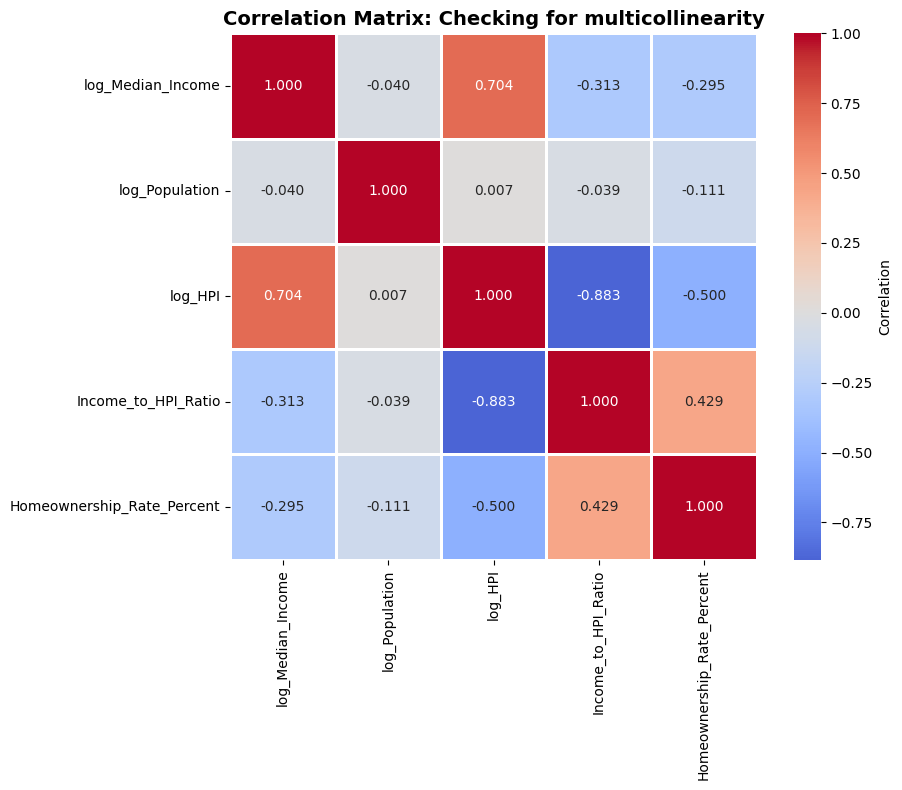

In [ ]:
# Multicollinearity Check:

correlation_cols = ['log_Median_Income', 'log_Population', 'log_HPI',
                    'Income_to_HPI_Ratio', 'Homeownership_Rate_Percent']
corr_matrix = df_ml[correlation_cols].corr()

print(corr_matrix.round(3))

# Visual:

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix: Checking for multicollinearity", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



Multicollinearity:

Highest inter-feature correlation: -0.883

Between: log_HPI and Income_to_HPI_Ratio

Updated Assumption for Multicollinearity:

- After using a correlation matrix I found that log_HPI and Income_to_HPI_Ratio show very high correlation (-0.883). This violates the assumption that predictors are not highly correlated.

- To address this, I will remove one of the features. I have decided to keep the Income_to _HPI_Ratio, and drop the log_HPI variable from the dataset to reduce multicollinearity.

In [ ]:
df_ml = df_ml.drop(columns=['log_HPI'])

print(f"\nAll coluumns: ")
for i, col in enumerate(df_ml.columns, 1):
  print(f" {i}. {col}")



All coluumns: 
 1. State
 2. Year
 3. Median_Income_USD
 4. Homeownership_Rate_Percent
 5. Population
 6. log_Median_Income
 7. log_Population
 8. Region
 9. HPI
 10. Income_to_HPI_Ratio


Final Feature selection:

**Target variable --> Homeownership_Rate_Percent**

Based on multicollinearity analysis, I selected the following features for my regression model:



1.   log_Median_Income (continous)
2.   log_Population (continous)
3.   Income_to_HPI_Ratio (continous)

So a total of 3 features for now

Now this aligns much better with the linear regression assumptions!



**4. What Algorithm will you use?**



Algorithm selected: Multiple Linear Regression




What assumption does this algorithm make?

- **Linearity:** Assumes linear relations between predictors and target. I applied log transformations to improve linearity and will later check residual plots
- **Normality:** linear regression assumes residuals are approximately normal. Again log transfromations and a large sample will help with that
- **Homoscedasticity:** assumes constant error variance. This can be checked when looking at residuals versus predicted values.
- **Independence of observations:** Observations are independent of each other. This is slightly violated because of some states, but still works for the most part. I will acknowledge the partial violation while making interpretation and will use robust standard errors if needed
- **No multicollinearity:** Tested correlations and found that  log_HPI and Income_to_HPI_Ratio show very high correlation (-0.883). This violates the assumption that predictors are not highly correlated.To address this, I have removed one of the features. I have decided to keep the Income_to _HPI_Ratio, and drop the log_HPI variable from the dataset to reduce multicollinearity.

Is the algorithm prone to any issues that you should watch out for? Are there well-known mitigations you should use?

**Outliers:** may influence the OLS slope for the algorithm. To address this, I have performed log transformations since I have decided to keep my outliers (as they are not errors, but simply real state differences)


To summarize, linear regression is the best option for my ML task because:


- The task is a supervised learning tasks, since I have labelled data
- The target variable "Homeownership_Rate_Percent" is continuous and I want to measure how it changes with my chosen predictors
- Linear regression is interpretable for my dataset since its coefficients will directly show me the direction and magnitude of associations of my variables
- After log-transfromations and creation of the affordability feature, relationships are somewhat linear and suitable for regression.



**5. Hyperparameters:**

Because Linear regression doesn't have tuning parameters like 'k' for KNN or 'max_depth' in trees, there is no hyperparameters for the base model that I plan to use for this project

However, if in project 5 I decide to implement regularization to reduce variance, like Ridge or Lasso, then I would tune these hyperparameters.

For now, I will be doing:

- fit_intercept = True --> to keep intercept
- Standardize features using StandardScaler() before fitting.

**6. Post-processing**

Linear regression also does not require model pruning or similar formal post-processing.

But after fitting the model, I will perform some post-processing such as,

- Check residual vs predicted plots as a part of post-processing
- I will report model performance by calculating metrics such as r2, MAE, and RMSE.

**7. ML Code Run**

In [ ]:
# Importing required libraries:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
# Checking the shape of df_ml to ensure I have 10 columns
# to verify that log_HPI column is removed
# (as it was responsible for causing multicollinearity)
print(df_ml.shape)
print(df_ml.columns.tolist())

(1020, 10)
['State', 'Year', 'Median_Income_USD', 'Homeownership_Rate_Percent', 'Population', 'log_Median_Income', 'log_Population', 'Region', 'HPI', 'Income_to_HPI_Ratio']


In [ ]:
# Setting up target and feature variables before beginning Machine Learning task

target = "Homeownership_Rate_Percent"

features = ["log_Median_Income", "log_Population", "Income_to_HPI_Ratio"]
all_columns = features + [target]

# Verifying one last time that absolutely no observations with missing values are involved in ML
# Therefore, dropping any rows which have missing values
# Checking the length of the dataset (if length = 1020, no rows dropped)

df_ml = df_ml.dropna(subset=all_columns).copy()
print("Number of rows after dropping rows with missing values:", len(df_ml))


Number of rows after dropping rows with missing values: 1020


In [ ]:
# Creating the train-test split:

X = df_ml[features].copy()
y = df_ml[target].copy()

# Creating an 80/20 split:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Checking if the train test split is done correctly:
# Must be 1020*0.8 = 816 --> Train shape; 1020*0.2 = 204 --> Test shape

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (816, 3), Test shape: (204, 3)


In [ ]:
# Scaling Features (Using StandardScaler):

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Fitting the Linear regression model:

model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled, y_train)

# Prediction:

y_predict = model.predict(X_test_scaled)

# Accuracy (R^2 for regression)

r2 = r2_score(y_test, y_predict)

# Extra

# Other metrics --> to understand the big picture (will do this in more detail in project 5):

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
mae = mean_absolute_error(y_test, y_predict)

print("Model Performance:\n")
print(f"R^2 (accuracy): {r2: .4f}")
print("\nEXTRA METRICS:\n")
print(f"RMSE: {rmse: .4f}")
print(f"MAE: {mae: .4f}")



Model Performance:

R^2 (accuracy):  0.2832

EXTRA METRICS:

RMSE:  5.8017
MAE:  4.0698


**Model Performance:**

**R2 = 0.2832**

- This means that the model explains about 28.3% of variation in homeownrship rates accross U.S states and years.

- This seems reasonable for a real-world socioeconomic data, knowing that there are many more factors that could have an effect on the values (ex. housing supply, inflation, mortgage rates etc).

- However, there is room for improvement, so I might look into either looking into some other factors that I could include in my model, or try different feature sets for my model (created in step 3).

**RMSE = 5.80 percent**

- This means that predictions are off by about 5.8% on average

- For example, if a states homeownership rate is 66%, the model will predict somewhere between 60-72%

**MAE = 4.07 percent**

- The model is off by about 4% on average, which means model is generally stable but might occassionaly make bigger errors

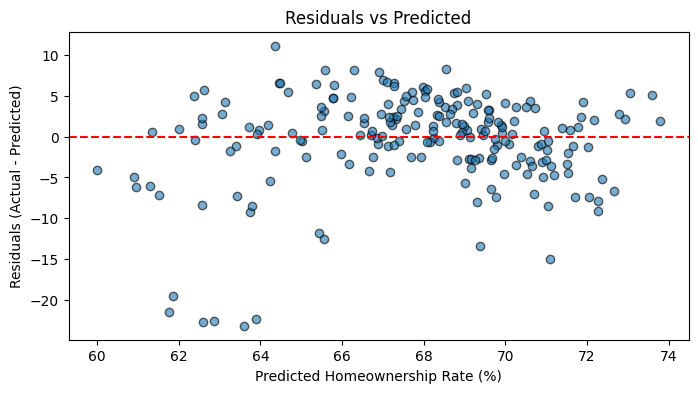

In [ ]:
# As mentioned in the post-processing section,
# since linear regression does not have any formal post-processing involved,
# I have decided to show the residuals vs predicted plot
# and discuss what I see:

residuals = y_test - y_predict

plt.figure(figsize=(8,4))
plt.scatter(y_predict, residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Homeownership Rate (%)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.show()


The scatter plot above for Residuals vs Predicted shows the following:

- The spread of points are somewhat around the perfect prediction line (the red line)

- It is not forming a curve or any other distinct pattern that would show problems with the residuals (large errors)

- Densely clustered around the 67-71% homeownership values

- This shows model is not systematically overpredicting or underpredicting.

- There are a few negative residuals which show underprediction for a few states

- This means that the model probably overestimated for these states.

- This behaviour could be due to the presence of outliers like the unusual housing markets of D.C and California.

- This plot and the model performance suggest that the selected features are reasonable but still imperfect for showing linear approximation of relationship between income, population, and homeownership.

# **Model Evaluation, Insights & Policy Decision**



**2. Evaluate Machine Learning Task**

Metrics selected to effectively measure the performance of the machine learning model:

1. R^2:
- Measures the proportion of variance explained by the model (Multiple Linear Regression).
- The R^2 can range from 0 to 1 and a higher value would suggest a higher proportion of variance is explained by the model.
- From project 4, I got R^2 value of 0.2832
- This means that the model explains about 28.3% of variation in homeownership rates accross U.S states and years.

2. RMSE (Root Mean Squared Error):
- Measures the average magnitude of prediction errors (in %).
- The value can range from 0 to infinity, where lower values are better.
- From project 4, I got RMSE = 5.8%
- This means that the predictions made are off by about 5.8%

3. MAE (Mean Absolute Error):
- Measures the average absolute prediction error (in %).
- The value again ranges from 0 to infinity =, where lower value is better (because it shows prediction error).
- MAE is more robust to outliers than RMSE. Therefore it is a good metric to evaluate for my dataset.
- From project 4, MAE = 4.07%
- This means that the model is off by about 4% on average, which means model is generally stable but might occassionaly make bigger errors.

4. MAPE (Mean Absolute Percentage Error):
- Measures the average percentage error relative to actual values.
- The value ranges from 0 to infinity as it is a percentage, and a lower percentage of MAPE is better.
- I will be evaluating this metric in the next steps of this project.

5. Cross-Validation (using R^2):

- This measures the average R^2 across multiple train-test splits.
- This will test the generalization and stability of the model (reduces risk of overfitting)
- This also helps confirm that the model didn't get lucky with the 80/20 split that it did.
- I will be evaluating this metric in the next steps of this project.

Is comparing metrics across models needed?

Yes, comparing metrics is necessary. Comparing metrics will help me determine if the algorithm that I have selected (linear regression) is better than other algorithms. For instance, linear regression makes strong assumptions like linearity and normality in the data but, what if other models like a random forest is better for capturing non-linear relationships that may exist in my data.

Another reason to perform metric comparison is to know if I can achieve an accuracy better than 28% (R^2 = 0.28).

Moreover, comparing training versus test performance across models will reveal which models generalize the best

How will I compare metrics?

1. Train multiple algorithms on the data
2. Calculate all 5 metrics for each algorithm
3. Use the same train-test split for each algorithm for fair comparison
4. Create visualizations to better understand the metrics
5. Determine which model is comparatively better

In [ ]:
# Fitting the Linear regression model (repetition from project 4):

model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled, y_train)

# Prediction:

y_predict = model.predict(X_test_scaled)

# Accuracy (R^2 for regression)

r2 = r2_score(y_test, y_predict)

# Extra

# Other metrics --> to understand the big picture (will do this in more detail in project 5):

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
mae = mean_absolute_error(y_test, y_predict)

print("Model Performance:\n")
print(f"R^2 (accuracy): {r2: .4f}")
print(f"RMSE: {rmse: .4f}")
print(f"MAE: {mae: .4f}")

Model Performance:

R^2 (accuracy):  0.2832

EXTRA METRICS:

RMSE:  5.8017
MAE:  4.0698


Computing train and test metrics for the base model (linear regression):

In [ ]:
from sklearn.model_selection import cross_val_score

base_model = LinearRegression(fit_intercept=True)
base_model.fit(X_train_scaled, y_train)

y_train_predict = base_model.predict(X_train_scaled)
y_test_predict = base_model.predict(X_test_scaled)

# R^2
train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)

print("R^2 train:", train_r2)
print("R^2 test:", test_r2)

# RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

print("\n")
print("RMSE train:", train_rmse)
print("RMSE test:", test_rmse)

# MAE
train_mae = mean_absolute_error(y_train, y_train_predict)
test_mae = mean_absolute_error(y_test, y_test_predict)

print("\n")
print("MAE train:", train_mae)
print("MAE test:", test_mae)

# MAPE

def MAPE(true, pred):
  return np.mean(np.abs((true - pred) / true)) * 100

train_mape = MAPE(y_train, y_train_predict)
test_mape = MAPE(y_test, y_test_predict)

print("\n")
print("MAPE train:", train_mape)
print("MAPE test:", test_mape)

# Cross-Validation (5-fold):

cv_scores = cross_val_score(
    base_model, X_train_scaled, y_train, cv=5, scoring='r2'
)

print("\n")
print("5-Fold Cross-Validation:")
print("\nMean CV R^2:", cv_scores.mean())
print("Std CV R^2:", cv_scores.std())

R^2 train: 0.20219915959504553
R^2 test: 0.2832205055271656


RMSE train: 5.334698491783223
RMSE test: 5.801665982531124


MAE train: 3.9871933827138935
MAE test: 4.069756842374431


MAPE train: 6.237616521866339
MAPE test: 6.736791729435461


5-Fold Cross-Validation:

Mean CV R^2: 0.1853744465536153
Std CV R^2: 0.04482405990243197


Visualization of metrics:

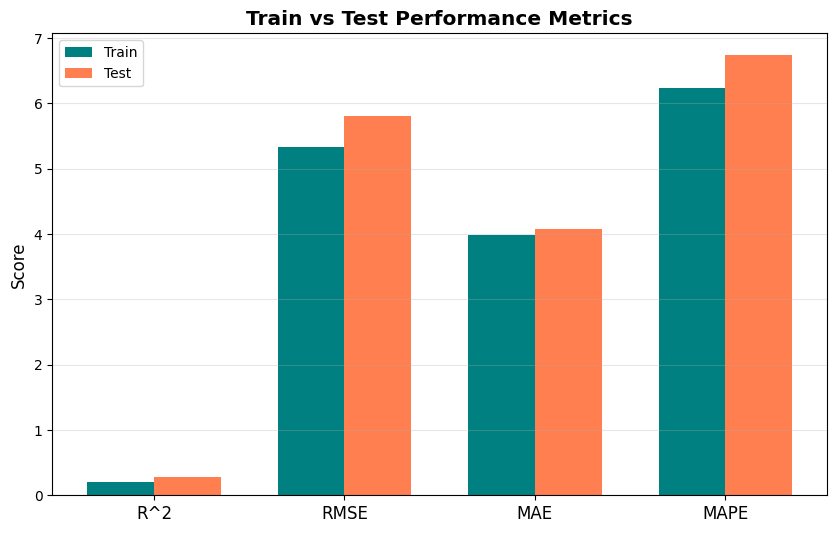

In [ ]:
# Bar chart comparing Train vs Test for each metric:

metrics = ["R^2", "RMSE", "MAE", "MAPE"]
train_metrics = [train_r2, train_rmse, train_mae, train_mape]
test_metrics = [test_r2, test_rmse, test_mae, test_mape]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_metrics, width, label="Train", color="teal")
plt.bar(x + width/2, test_metrics, width, label="Test", color="coral")

plt.xticks(x, metrics, fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Train vs Test Performance Metrics", fontsize=14.5, fontweight="bold")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()


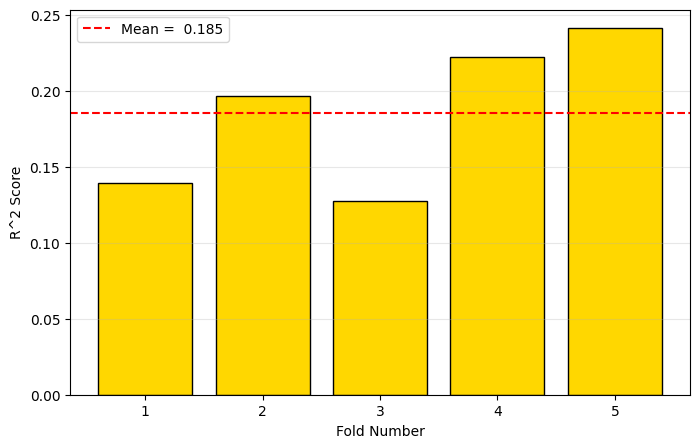

In [ ]:
# Cross-Validation Visualization:

plt.figure(figsize=(8,5))
plt.bar(range(1,6), cv_scores, color="gold", edgecolor="black")
plt.axhline(cv_scores.mean(), color="red", linestyle="--", label = f"Mean = {cv_scores.mean(): .3f}")
plt.xlabel("Fold Number")
plt.ylabel("R^2 Score")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()

Understanding metrics and visualizations:

**Train R^2 = 0.20 & Test R^2 = 0.28**

- This means the model is able to explain 28% of the variation in homeownership across the states over the years.

- Note that the Test R^2 is very slightly higher than the Train R^2. This suggests that there is no overfitting and the model is generalizing pretty well

**Train RMSE = 5.33 & Test RMSE = 5.80**

- On average, the model's predictions are off by 5.8%

- Given that homeownership mostly varies between 40% and 83%, this error is reasonable but shows that the model is not highly precise.

**Train MAE = 3.99 & Test MAE = 4.07**

- Again most predictions are made within 4% (+ or -) of the actual value, which is reasonable given the complexity of housing and multiple factors that effect it.

**Train MAPE = 6.24 & Test MAPE = 6.73**

- On average, the model predictions are off by about 6% which shows that the model predictions are reasonable but can be improved.

**Cross-Validation (5-Fold)**

**Mean CV R^2 = 0.185 & Std = 0.044**

- Cross-Validation tells us how stable the model is across different splits and that the model is not getting "lucky" because of a split that happened.

- Mean of 0.185 confirms that the model is generalizing consistently although this value is lower than the test R^2 discussed earlier.

- Std of 0.044 shows that there is very low variation across folds.

- This means that the model is stable and did not depend on a lucky training split.

- R^2 for each fold is shown in the bar graph above and it supports the above points.


**EXTRA CREDIT:**

I am planning to test three additional algorithms to see if I can get an improved accuracy compared to the accuracy I got with my baseline Linear Regression model.



**1. Ridge Regression:**

- Linear regression with L2 regularization.

- Shrinks coefficients which prevents overfitting

- Since ridge regression works well with features that are correlated with each other and my dataset has features of that nature, hence I decided to use this algorithm.

- Good for handling multicollinearity and generally more stable than OLS


Hyperparameter:

alpha (regularization strength) values to test:
0.01, 0.1, 1.0, 10.0




In [ ]:
# Creating a dictionary to store results (metrics):

extra_results = {}

# function for metrics computation:

def compute_metrics(model_name, y_train_predict, y_test_predict):
  train_r2 = r2_score(y_train, y_train_predict)
  test_r2 = r2_score(y_test, y_test_predict)

  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))

  train_mae = mean_absolute_error(y_train, y_train_predict)
  test_mae = mean_absolute_error(y_test, y_test_predict)

  train_mape = (np.mean(np.abs((y_train - y_train_predict) / y_train)) * 100)
  test_mape = (np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100)

  metrics = {"train_r2": train_r2,
             "test_r2": test_r2,
             "train_rmse": train_rmse,
             "test_rmse": test_rmse,
             "train_mae": train_mae,
             "test_mae": test_mae,
             "train_mape": train_mape,
             "test_mape": test_mape
  }
  return metrics

In [ ]:
# Ridge Regression --> Reduces overfitting
from sklearn.linear_model import Ridge, Lasso

ridge_alphas = [0.01, 0.1, 1.0, 10.0]
ridge_r2 = -np.inf
ridge_alpha = None

for alpha in ridge_alphas:
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(X_train_scaled, y_train)

  y_test_ridge = ridge_model.predict(X_test_scaled)
  test_r2 = r2_score(y_test, y_test_ridge)

  print(f"Alpha = {alpha}, Test R^2 = {test_r2:.4f}")

  if test_r2 > ridge_r2:
    ridge_r2 = test_r2
    ridge_alpha = alpha

print(f"\n Best Ridge alpha: {ridge_alpha}, R^2 = {ridge_r2:.4f}")



Alpha = 0.01, Test R^2 = 0.2832
Alpha = 0.1, Test R^2 = 0.2832
Alpha = 1.0, Test R^2 = 0.2831
Alpha = 10.0, Test R^2 = 0.2822

 Best Ridge alpha: 0.01, R^2 = 0.2832


Training the Ridge regression algorithm on the selected 'best' alpha:

In [ ]:
# Training Ridge Model:

ridge_final = Ridge(alpha=ridge_alpha)
ridge_final.fit(X_train_scaled, y_train)

# Prediction:

ridge_train_predict = ridge_final.predict(X_train_scaled)
ridge_test_predict = ridge_final.predict(X_test_scaled)

extra_results["Ridge Regression"] = compute_metrics(
    "Ridge Regression",
    ridge_train_predict,
    ridge_test_predict
)

# Cross-Validation for ridge:

ridge_cv = cross_val_score(ridge_final, X_train_scaled, y_train, cv=5, scoring="r2")
print("\nRidge CV Mean R^2:", ridge_cv.mean())
print("Ridge CV Std:", ridge_cv.std())




Ridge CV Mean R^2: 0.18537458070228946
Ridge CV Std: 0.04482331047811949


**Results for Ridge Regression:**

- Ridge Regression did not improve the accuracy of the model.

- All R^2 values obtained are almost identical to the original linear regression I used (0.2832)

**Why I think ridge regression didn't help:**

- The dataset I am training on has only 3 features

- The linear model I used as my baseline was already stable.

- Since dataset is clean already, meaning very little multicollinearity to correct, therefore the regularization didn't have any effect.

In conclusion, Ridge neither harms nor improves the model as the original model is already simple and was not overfitting.


**2. Lasso Regression**



- Linear regression with L1 regularization.

- Lasso attempts to shrink the coefficient of a feature to almost zero if it thinks the feature is not important.

- This will help me understand if my three chosen features are truly contributing.

Hyperparameter:

alpha (regularization strength) values to test:
0.01, 0.1, 1.0

In [ ]:
# Lasso Regression

lasso_alphas = [0.01, 0.1, 1.0]
lasso_r2 = -np.inf
lasso_alpha = None

for alpha in lasso_alphas:
  lasso_model = Lasso(alpha=alpha, max_iter=10000)
  lasso_model.fit(X_train_scaled, y_train)

  y_test_lasso = lasso_model.predict(X_test_scaled)
  test_r2 = r2_score(y_test, y_test_lasso)
  n_nonzero = np.sum(lasso_model.coef_ != 0)

  print(f"Alpha = {alpha}, Test R^2 = {test_r2:.4f}, Features kept: {n_nonzero}/3")

  if test_r2 > lasso_r2:
    lasso_r2 = test_r2
    lasso_alpha = alpha

print(f"\nBest Lasso alpha: {lasso_alpha}, R^2 = {lasso_r2:.4f}")

Alpha = 0.01, Test R^2 = 0.2828, Features kept: 3/3
Alpha = 0.1, Test R^2 = 0.2782, Features kept: 3/3
Alpha = 1.0, Test R^2 = 0.1852, Features kept: 2/3

Best Lasso alpha: 0.01, R^2 = 0.2828


Training Lasso algorithm on the selected 'best' alpha:

In [ ]:
# Training Lasso Model

lasso_final = Lasso(alpha=lasso_alpha, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

lasso_train_predict = lasso_final.predict(X_train_scaled)
lasso_test_predict = lasso_final.predict(X_test_scaled)

extra_results["Lasso Regression"] = compute_metrics(
    "Lasso Regression",
    lasso_train_predict,
    lasso_test_predict
)

# Cross-Validation for lasso:

lasso_cv = cross_val_score(lasso_final, X_train_scaled, y_train, cv=5, scoring="r2")
print("\nLasso CV Mean R^2:", lasso_cv.mean())
print("Lasso CV Std:", lasso_cv.std())

print("\nLasso Coefficients (Features Selection):")

for feat, coef in zip(features, lasso_final.coef_):
  status = "Kept" if coef != 0 else "Removed"
  print(f"{feat}: {coef:.4f} -> {status}")


Lasso CV Mean R^2: 0.18539892301278285
Lasso CV Std: 0.044544777474595926

Lasso Coefficients (Features Selection):
log_Median_Income: -1.0535 -> Kept
log_Population: -0.6500 -> Kept
Income_to_HPI_Ratio: 2.0798 -> Kept


**Results for Lasso Regression:**

- Lasso did not improve model accuracy

- R^2 stayed around the same as the baseline and ridge regression R^2 values.

**Why I think Lasso did not work well (and did not drop any features):**

- Lasso did not drop any of my selected features (for the chosen alpha = 0.01; R^2 = 0.2828)

- This means that all three features that I selected carry meaningful signal and couldn't be dropped.


**Takeaways from regularization attempt:**

- Neither Ridge nor Lasso improved my model accuracy.

- This could be due to multiple factors like small dataset and using only three features

- Regularization would have been useful if I had many correlated features, which I didn't have in my dataset

- The linear relationship in my dataset was proven to be weak (as shown earlier using scatterplots and correlation matrix)

On this note, I decided to experiment with a ***non-linear algorithm*** to see if it performs better due to hidden non-linear patterns and relationships within my variables.

**3. Random Forest Regressor**

- Random Forest is a non-linear model

- It will be useful in case the relationship between variables is not strictly linear.

- It will work well if there exists interactions or non-linear patterns within my dataset.

- Given my scatterplot and correlations showed a weak linear relationship, I wanted to see if perhaps a non-linear algorithm could capture additional structure

In [ ]:
# Random Forest Regressor --> for non-linear relations

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42

)

rf_model.fit(X_train_scaled, y_train)

rf_train_predict = rf_model.predict(X_train_scaled)
rf_test_predict = rf_model.predict(X_test_scaled)

extra_results["Random Forest"] = compute_metrics(
    "Random Forest",
    rf_train_predict,
    rf_test_predict
)

# Cross-Validation:

rf_cv = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring="r2")

print("Random Forest CV Mean R^2:", rf_cv.mean())
print("Random Forest CV Std:", rf_cv.std())

Random Forest CV Mean R^2: 0.6483556856819179
Random Forest CV Std: 0.06260693841701977


Displaying a table with all the metrics for the extra algorithms I used (for easier comparison):

In [ ]:
results_df = pd.DataFrame(extra_results).T
results_df

,train_r2,test_r2,train_rmse,test_rmse,train_mae,test_mae,train_mape,test_mape
Ridge Regression,0.202199,0.283219,5.334698,5.801670,3.987191,4.069757,6.237614,6.736794
Lasso Regression,0.202192,0.282785,5.334723,5.803428,3.986686,4.069775,6.237146,6.737464
Random Forest,0.959656,0.863074,1.199645,2.535730,0.841695,1.865729,1.258550,2.808653


**Random Forest Results:**

Note: Baseline (linear regression) R^2 = 0.28

**Random Forest R^2 = 0.86**

- Random Forest performed *dramatically better* than the linear models

- This means that the relationship between Homeownership and the predictors are not necessarily linear, since a non-linear model fitted better.

- Since the train R^2 = 0.96 and test R^2 = 0.863, it means the model is not overfitting.

- This also shows there is pattern that the model is able to generalize well and the pattern is ***not linear***.

- The CV Mean R^2 = 0.648 suggests that the across different data splits the model consistently performed better and a smal std means the variation was not too high between each split's performance.



**Error Metrics for Random Forest:**

Test RMSE:

- Linear = 5.80
- Random Forest = 2.53 (better)

Test MAE:

- Linear = 4.06

- Random Forest = 1.87 (way better again)

This means that the prediction errors are now within 2% of the actual homeownership rates which is way better than 4 to 6% prediction range that was produced by the linear models.

**Random Forest Plot - Predicted vs Actual Homeownership Rate**

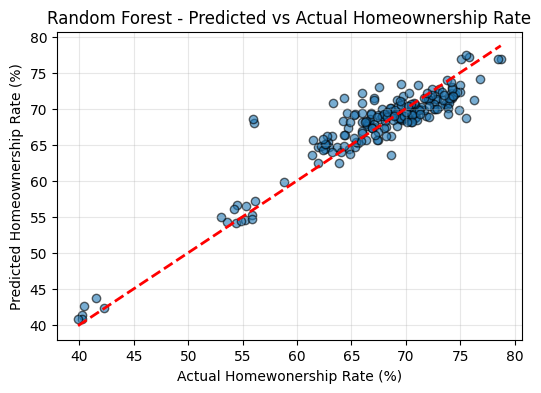

In [ ]:
# Predicted vs Actual Homeownership Rates:

plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_test_predict, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel("Actual Homewonership Rate (%)")
plt.ylabel("Predicted Homeownership Rate (%)")
plt.title("Random Forest - Predicted vs Actual Homeownership Rate")
plt.grid(alpha=0.3)
plt.show()


- The plot shows that majority of the predictions are clustered tightly around the red dotted line (perfect prediction).

- This means the model is accurately capture the homeownership rates.

- The model shows most points lying in the range 63 to 75%, which is the dominant rate in the dataset. Similarly, model captured some of the low rates effectively too, around 40%

**Random Forest Plot - Residual vs Predicted**

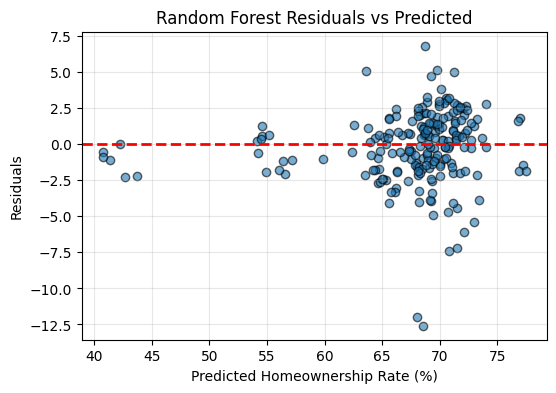

In [ ]:
# Residual vs Predicted

rf_residuals = y_test - rf_test_predict
plt.figure(figsize=(6,4))
plt.scatter(rf_test_predict, rf_residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Homeownership Rate (%)")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals vs Predicted")
plt.grid(alpha=0.3)
plt.show()



- The plot shows that most residuals are tightly clustered around zero. This indicates that the Random Forest model is not under or over predicting. There are two clear outliers however, around residual of -12.5.

- This large negative residual means that the model had predicted a higher homeownership rate than the actual value for those two points.

- In general, the residual pattern is random, evenly scattered, which means the model is working well with the dataset and is a good fit.

**Random Forest Plot - Residual Distribution**

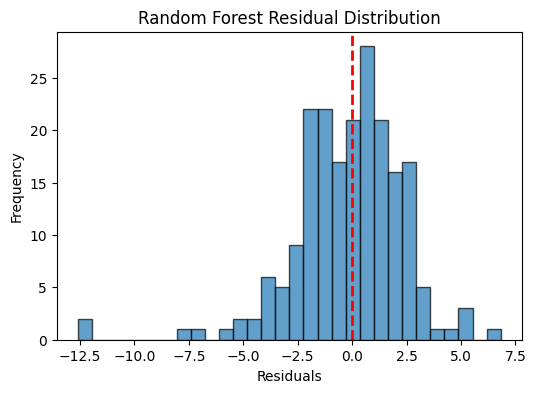

In [ ]:
# Residuals Distribution:

plt.figure(figsize=(6,4))
plt.hist(rf_residuals, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Random Forest Residual Distribution")
plt.show()



- The plot looks like a bell-shaped distribution.

- There is a slight tail towards the left which is due to the high negative residual found in the previous plot.

- This means prediction errors are generally small and evenly distributed.

**3. Insights**

**Hypothesis Evaluation**

Originally, my hypothesis statement was: "If the median household income of a state increases, the homeownership rate in that state will also increase."

Then during data exploration and visualization, I noticed a slight negative trend between median income and homeownership

This led me to revise my hypothesis statement before beginning the analysis and hypothesis testing of my dataset.

Therefore the revised hypothesis is: "If median household income of a state increases, then the homeownership rate in that state will decrease"

Key findings after revising the hypothesis statement:

1. Income showed slight negative relation with homeownership

2. The negative relationship was due to a missing piece, housing affordability. To explore housing affordability I collected Housing Price Index data for all states over the years and created a calculated column called HPI_to_Income_Ratio which directly measures affordability of housing.

3. Therefore, during analysis step, accounting for affordability helped the relation between homeownership and income features become more clear and highly predictive.



**Assumptions**

Assumption 1: Higher income always means more homeownership. Since, intuitively people with higher income should be more likely to own homes.

- This was proven wrong during the EDA stage of the data science lifecycle.

- I had failed to consider high-income areas tend to also have high housing cost and urbanization.

- To adjust my assumption, I revised my hypothesis statement and collected Housing Price data to create a calculated affordability metric to use for further analysis.

Assumption 2: Linear relationships are sufficient, hence a simple linear model will capture the relationships between my variables adequately.

- I found that this was mostly wrong after performing training and testing using both linear and non-linear models.

- Linear models achieved R^2 of only around 28%, whereas, Random Forest achieved an R^2 of around 86%(almost 3X improvement!)

- This suggests that non-linear interactions exists in my data and Income X HPI interactions matter more than additive effects (suggests non-linear interaction between various socioeconomic factors)

Assumption 4: Using 3 features (Income, Population, and affordability) would be enough to explain most variance.

- This assumption was surprisingly correct!

- Reducing the number of features seemed to help my model performance as 86% of variance was explained in the data by my model.

- This means the features I selcted for analysis were good.

**Is the problem different from what I initially thought?**

Yes.

- During the data collection step, I assumed that median income of a state is a clear predictor of homeownership.

- Then, during data preprocessing I noticed that California (one of my outliers) has high income but low homeownership. This made me question my previous assumption.

- However, after performing EDA, I observed a negative correlation. I noticed that higher income was pointing towards lower homeownership. This meant that my previous assumption about income being positively correlated with homeownership was wrong and that there were other factors at play.

- Then during hypotheis testing and analysis, I decided to measure affordability by collecting housing price data for all states over all years. This predictor helped me in explaining most of the variance in the dataset, as proven by model performance in the final stage of the project.

**Things I would do differently if I started over:**

**Start with literature review.**

- I realized that this was important when I naively assumed that income is the key driver of homeownership in a state, when in reality there are multiple factors at play that determine homeownership rates in a state.

**Include more features from the beginning.**

- Although the features I had initially (income, population) were very helpful to understand regional differences and patterns, I should have collected more data that could have had an affect on homeownership rates.

- I did collect HPI data during the later stages which, I then used to calculate the affordability metric as the ratio of income and HPI features which turned out to be very helpful in my analysis and revealed hidden patterns in my data.

**Test more non-linear algorithms**

- From my visualizations and analysis during the EDA stages, I assumed that my data was linear and hence focused on testing only linear models until the very end where I tested the Random Forest model.

- Surprisingly, my non-linear Random Forest model performed significantly better than non-linear models! This suggest that there are non-linear relationships in within my dataset.

- I should have considered this early-on since I was dealing with complex socioeconomic data which tends to have non-linear patterns.

**Consider panel data methods**

- For this project, I treated all state-year pairs as independent.

- However, temporal autocorrelation exists in my data (2008 housing crisis, COVID related spikes)

- Random Forest Model partially captures this through interactions. But a proper panel data model would have been even better.


**Policy Implications**





Affordable Housing Programs:

- Based on my findings, I noticed that housing affordability is a huge factor in understanding homeownership rates.

- Most affordable housing programs focus on income of a person.

- Instead the policies must have eligibility based on income-to-HPI ratio which would take affordability of housing into consideration

- For instance, someone earing 65K USD in expensive CA needs more help through housing programs than someone earning 65K USD in WV, even though the incomes are equal.

Regional economic development using housing affordability strategically:

- My analysis suggested that large and heavily urbanized states have structural barriers to homeownership (population affect, high HPI and, urbanization)

- Therefore, policies regarding targeted job creations in affordable-housing states would help in multiple aspects of development. For example, by assisting people in moving to affordable housing zones would ease the population being dense in certain states compared to others.

- This policy development would also help with job creation in affordable states and reduce the huge urbanization gaps between some states


**Ethical Concerns**

1. Discrimination (historic racial discrimnation affects):

My analysis did not include racial distribution across states in the United States.

This means my analysis did not consider the fact that some minority/majority states may have systemic lower homeownership rates compared to population due to past discrimination against certain races and ethnicities.

So, if policy makers were to use my analysis to decide where to invest in housing programs, then they might avoid areas with low predicted homeownership rates, completely ignoring the underlying affects of race and historic discrimination that might have caused this.

2. Fairness (economic factors)

If my model was to be used by banks, lenders, or real estate companies, there is a risk of discrimination based on economic characteristics.

This would mean lower approval rates in lower-income regions and this would indirectly reinforce the already existing historic disparities.

Therefore, this might lead organizations to systematically disadvantage certain populations.




**Final Thoughts**

When I started working on this project, I thought data science was all about collecting data, running algorithms, and getting high accuracy.

I soon realized that data science is much more than some set goals that you have to achieve. It is about asking good questions, learning from mistakes, being iterrative, and telling honest/unbiased stories using data to have an impact.

Some teachnical skills that I mastered through the projects:

- Merging datasets from multiple sources

- Handling complex inconsistencies in data

- Dealing with outliers (carefully deciding if they must be kept or not)

- Creating domain specific features such as the calculated affordability ratio

- Using correlation and regional comparisons to discover hidden patterns

- Understanding which model to use based on how the dataset behaves (linear/non-linear; time series, etc.)

- Interpretting model metrics and understanding residuals, which can reveal a lot about how features interact with each other


In conclusion, I didn't just learn how to collect data and build models. I learned how to think like a data scientist, both through the course and the projects.

*Housing affordability is a real crisis affecting millions of people in America. If my analysis contributes even slightly towards deeply understanding the underlying factors affecting this crisis, then every hour dealing with the messy data, trying to understand it, was worth it to me.*